### Цель исследования: изучение потребление электроэнергии в странах Европы

Источник для скачивания данных и описание атрибутов: https://data.open-power-system-data.org/time_series/2018-06-30

Массив данных с дискретностью 1 час содержии информацию по потреблению электроэнергии в 37 европейских странах, а также дополнительные данные о генерации ветреных и солнечных электростанций для ряда стран

В данном исследовние нас будет интересовать прежде всего общее потребление электроэнергии (в основном в Австрии, но не только). И сравнение профилей потребления в разных странах, поиск "похожих" стран.

<b>Описание основных атрибутов:</b>
- utc_timestamp --- datetime --- Время в формате UTC
- AT_load_entsoe_transparency	--- числовой --- Общее потребление в Австрии по данным ENTSO-E Transparency Platform
- аналогичные атрибуты с объемом потребления для других стран

### Предварительные границы исследовательского проекта:
1. Базовое исследование структуры и характера данных, обработка и генерация вспомогательных признаков, визуализация
2. Статистическое исследование, изучение распределений
3. Исследование стандартными методами анализа временных рядов, проверка на стационарность
    - автокорреляционный анализ
4. Использование unsupervised методов для поиска аномалий в данных 
    - кластеризация и поиск похожих профилей (день, месяц)
5. Построение прогнозных моделей для предсказения потребления электроэнергии в будущем
6. Проверка статистических гипотез

In [6]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot as plt
%matplotlib inline

In [166]:
df = pd.read_csv('/Users/dvmalov/Downloads/TimeSeriesOpenData/time_series_60min_singleindex.csv', low_memory=False)

In [167]:
df.columns

Index(['utc_timestamp', 'cet_cest_timestamp',
       'AL_load_entsoe_power_statistics', 'AT_load_entsoe_power_statistics',
       'AT_load_entsoe_transparency', 'AT_solar_generation_actual',
       'AT_wind_onshore_generation_actual', 'BA_load_entsoe_power_statistics',
       'BA_load_entsoe_transparency', 'BE_load_entsoe_power_statistics',
       ...
       'SI_price_day_ahead', 'SI_solar_generation_actual',
       'SI_wind_onshore_generation_actual', 'SK_load_entsoe_power_statistics',
       'SK_load_entsoe_transparency', 'SK_price_day_ahead',
       'SK_solar_generation_actual', 'TR_load_entsoe_power_statistics',
       'UA_west_load_entsoe_power_statistics', 'interpolated_values'],
      dtype='object', length=217)

In [170]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AL_load_entsoe_power_statistics,8016.0,808.097801,214.364598,408.00,624.9550,820.00000,938.000000,1420.0000
AT_load_entsoe_power_statistics,105192.0,7382.141094,1552.341373,3622.00,6193.0000,7278.50000,8552.000000,11919.0000
AT_load_entsoe_transparency,30649.0,7086.220301,1409.329868,664.00,5969.0000,7052.00000,8101.000000,10788.0000
AT_solar_generation_actual,29929.0,114.540045,165.821647,0.00,0.0000,13.00000,194.000000,886.0000
AT_wind_onshore_generation_actual,73753.0,439.067672,482.411382,-1.00,92.0000,260.00000,615.000000,2662.0000
BA_load_entsoe_power_statistics,107351.0,1382.415432,258.103672,796.00,1179.0000,1405.00000,1562.000000,2237.0000
BA_load_entsoe_transparency,10978.0,1354.625731,277.607870,0.00,1214.7375,1398.71000,1517.315000,2731.6200
BE_load_entsoe_power_statistics,107351.0,9915.001351,1461.283680,5973.00,8767.0000,9970.00000,11015.000000,14274.0000
BE_load_entsoe_transparency,30472.0,9998.536904,1420.167135,5744.10,8883.4275,10070.67000,11044.227500,13750.0000
BE_price_day_ahead,29809.0,42.131202,21.875959,-41.31,30.0800,39.06000,49.910000,696.0200


In [173]:
df['dt'] = pd.to_datetime(df.utc_timestamp)
df = df.set_index(df.dt)
df = df.sort_index()

In [209]:
base_color = '#4444aa'

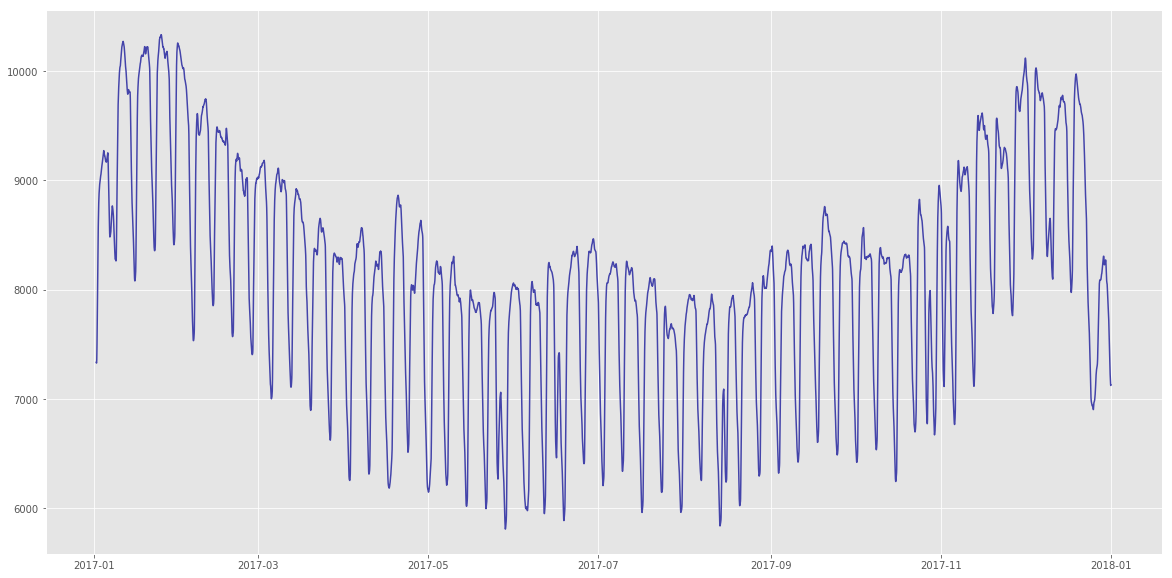

In [211]:
plt.figure(figsize=(20, 10))
plt.plot(df.AT_load_entsoe_power_statistics['2017-01-01':'2018-01-01'].rolling(24).mean(), color=base_color)

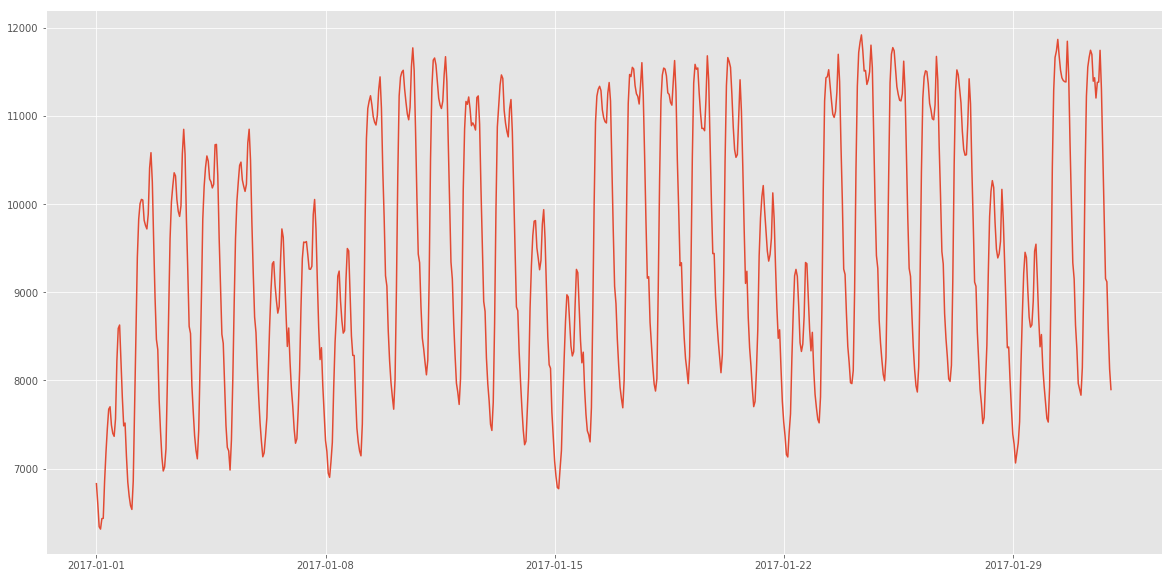

In [178]:
plt.figure(figsize=(20, 10))
plt.plot(df.AT_load_entsoe_power_statistics['2017-01-01 00:00:00':'2017-02-01 00:00:00'])

### Посмотрим глазами на графики дневной загрузки в канун нового года, 1 января и в "обычные" (для Европы) дни

In [ ]:
# Поколдуем немного, чтобы создать удобные методы визуализации произвольных часовых данных, что пригодится нам при 
# отладке моделей

In [234]:
from datetime import timedelta, datetime

In [296]:
def plot_days(data, s_date, shift_days, shift='1d', colors=['red', base_color]):
    s_date = s_date
    start_date = datetime.strptime(s_date, "%Y-%m-%d")
    day_shift = shift_days

    _df = data
    plt.figure(figsize=(20, 5))

    for cnt in range(day_shift):
        _start = start_date + timedelta(days=1 * cnt)
        _end = _start + timedelta(days=1, minutes=1)
        plt.plot(_df[_start:_end], color=colors[cnt % len(colors)])

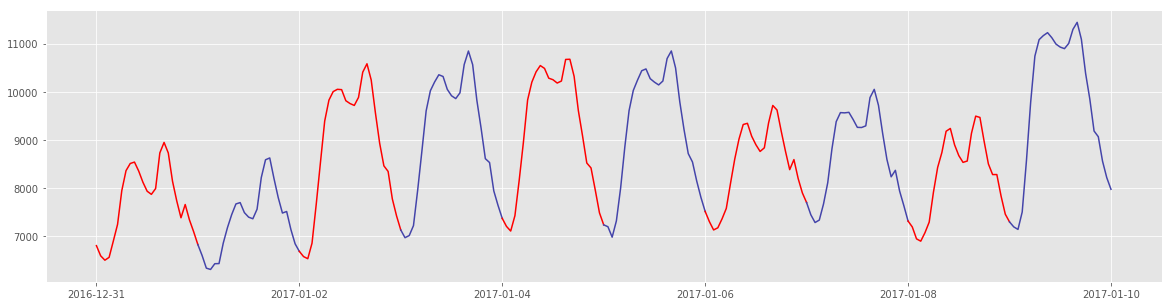

In [927]:
# посмотрим на несколько произвольных периодов - видим, что профили прослеживаются, но суммарное потребление зависит от дня
plot_days(df.AT_load_entsoe_power_statistics, '2016-12-31', 10, colors=['red', base_color])

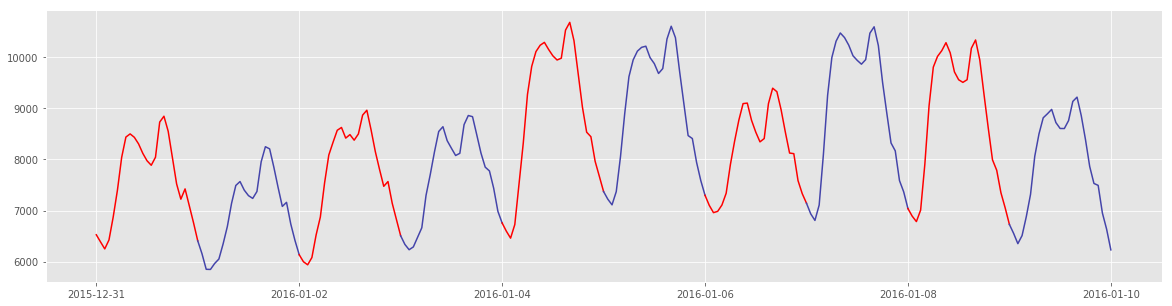

In [298]:
plot_days(df.AT_load_entsoe_power_statistics, '2015-12-31', 10)

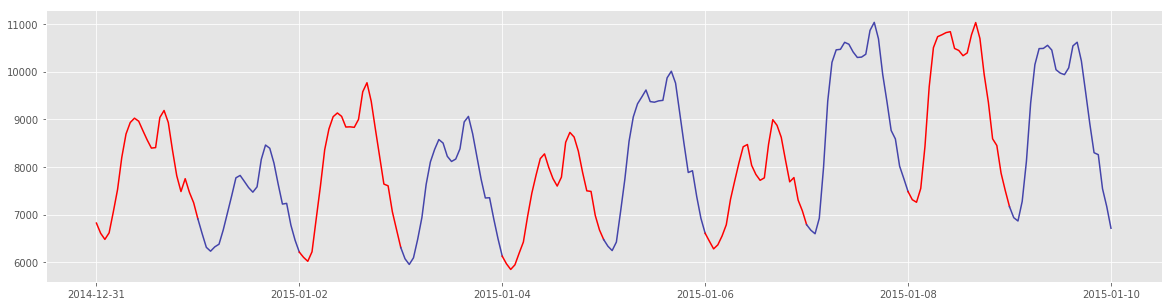

In [299]:
plot_days(df.AT_load_entsoe_power_statistics, '2014-12-31', 10)

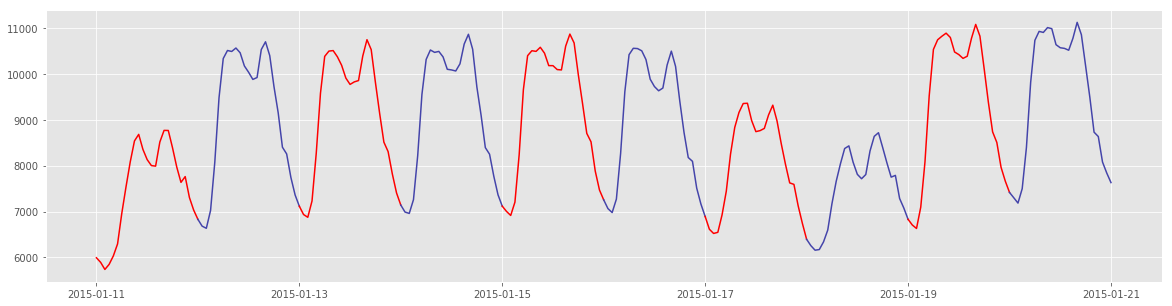

In [300]:
plot_days(df.AT_load_entsoe_power_statistics, '2015-01-11', 10)

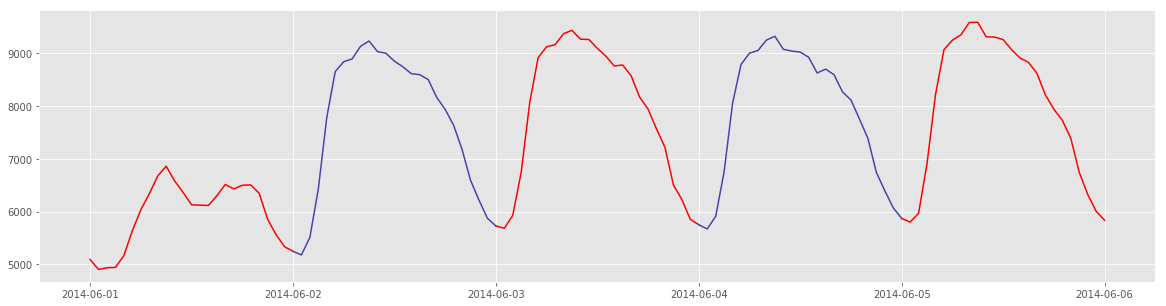

In [301]:
# А тут уже другой профиль летом
plot_days(df.AT_load_entsoe_power_statistics, '2014-06-01', 5)

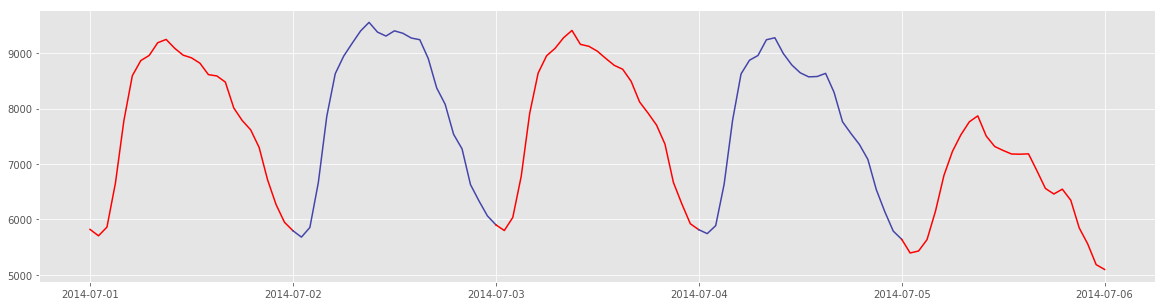

In [302]:
plot_days(df.AT_load_entsoe_power_statistics, '2014-07-01', 5)

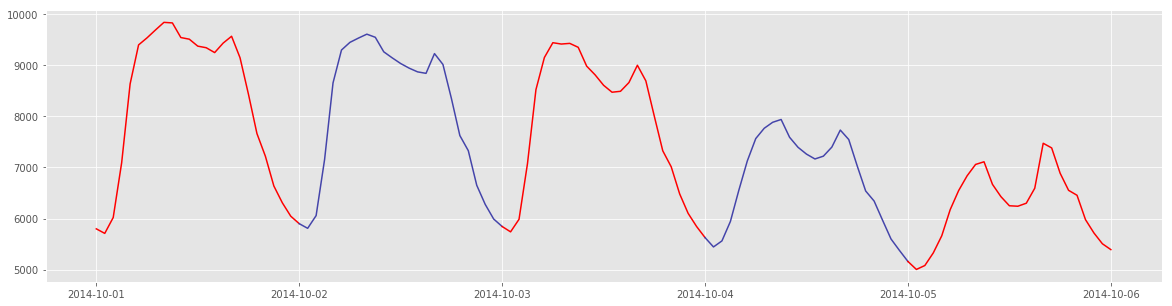

In [303]:
plot_days(df.AT_load_entsoe_power_statistics, '2014-10-01', 5)

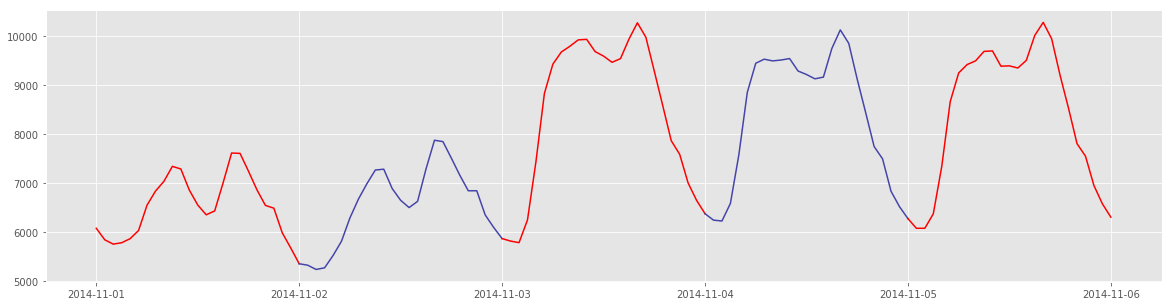

In [304]:
plot_days(df.AT_load_entsoe_power_statistics, '2014-11-01', 5)

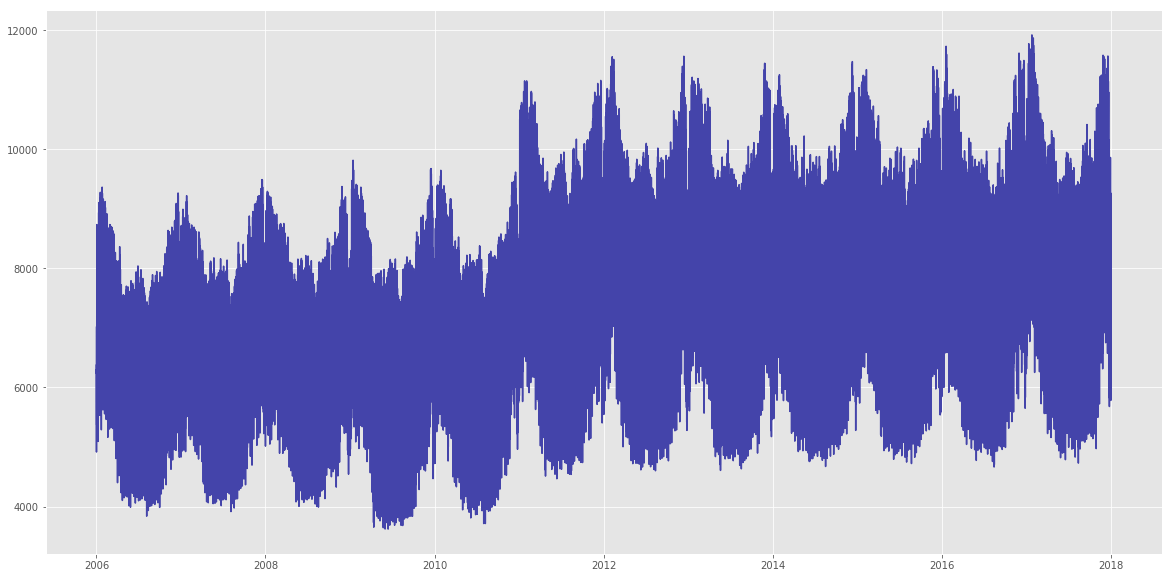

In [306]:
# Посмотрим на глобальную тенденцию по потреблению за все годы датасет, видим увеличение потребления после 2011 года
plt.figure(figsize=(20, 10))
plt.plot(df.AT_load_entsoe_power_statistics['2001-01-01':'2018-01-01'], color=base_color)

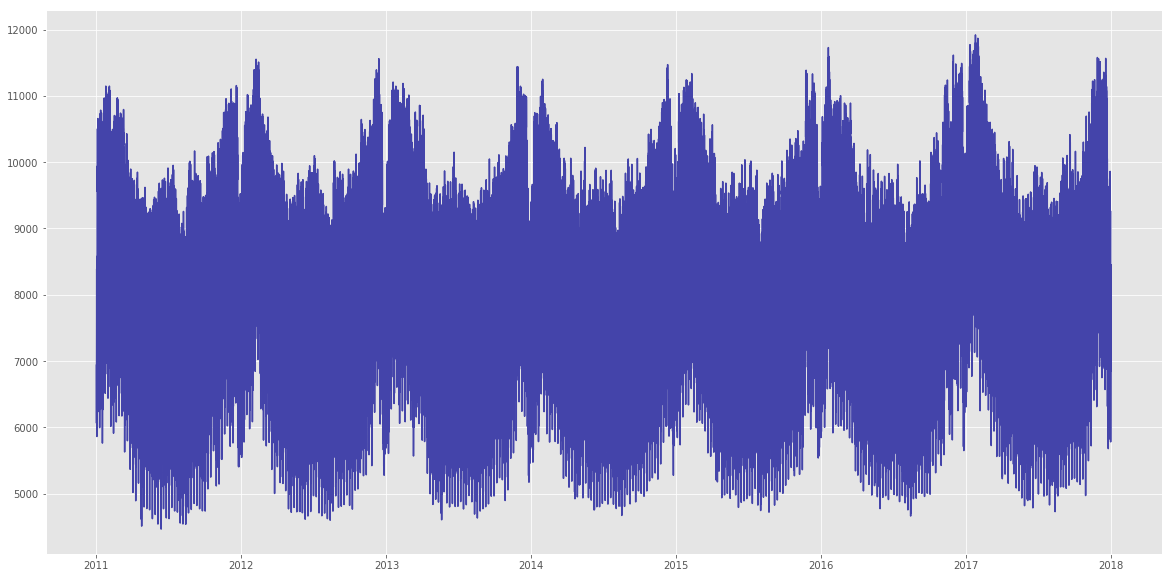

In [309]:
plt.figure(figsize=(20, 10))
plt.plot(df.AT_load_entsoe_power_statistics['2011-01-01':'2018-01-01'], color=base_color)

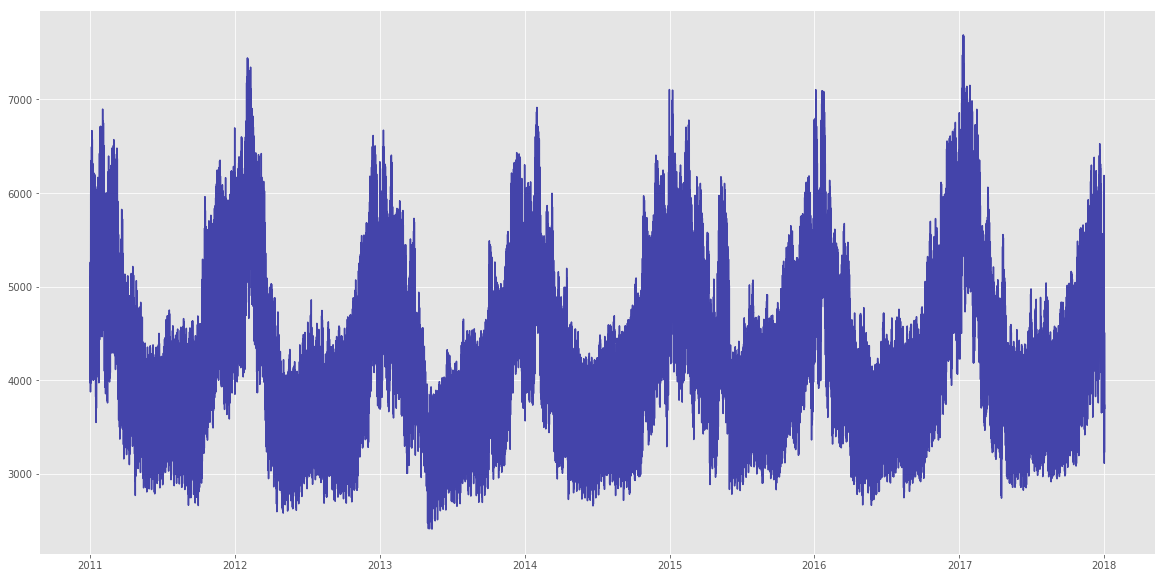

In [310]:
# И совсем другая годовая сезонност у Бельгии
plt.figure(figsize=(20, 10))
plt.plot(df.BG_load_entsoe_power_statistics['2011-01-01':'2018-01-01'], color=base_color)

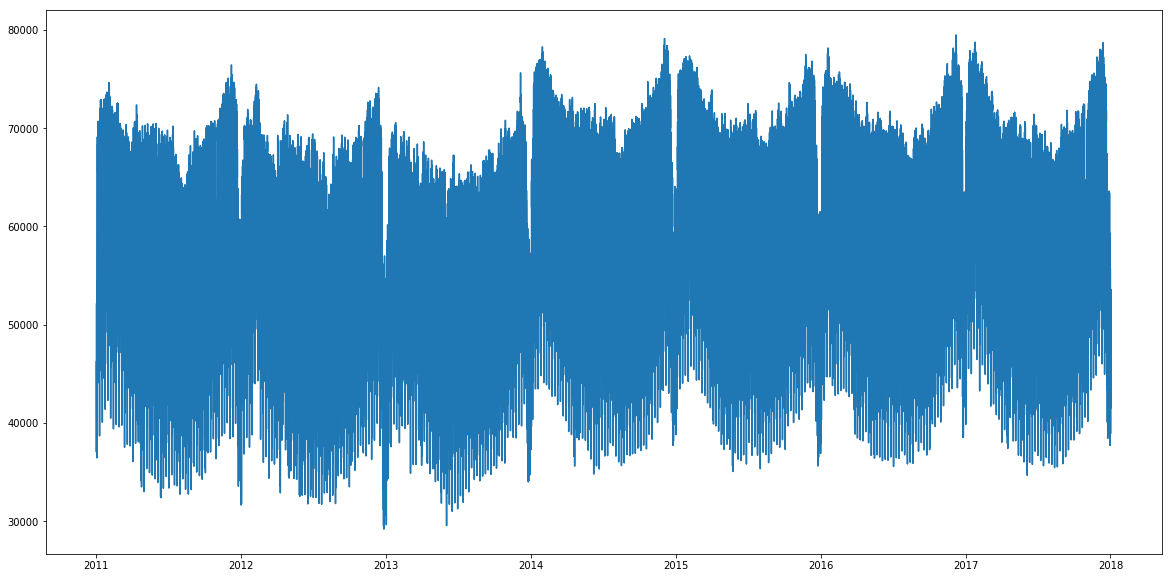

In [123]:
plt.figure(figsize=(20, 10))
plt.plot(df.DE_load_entsoe_power_statistics['2011-01-01':'2018-01-01'])

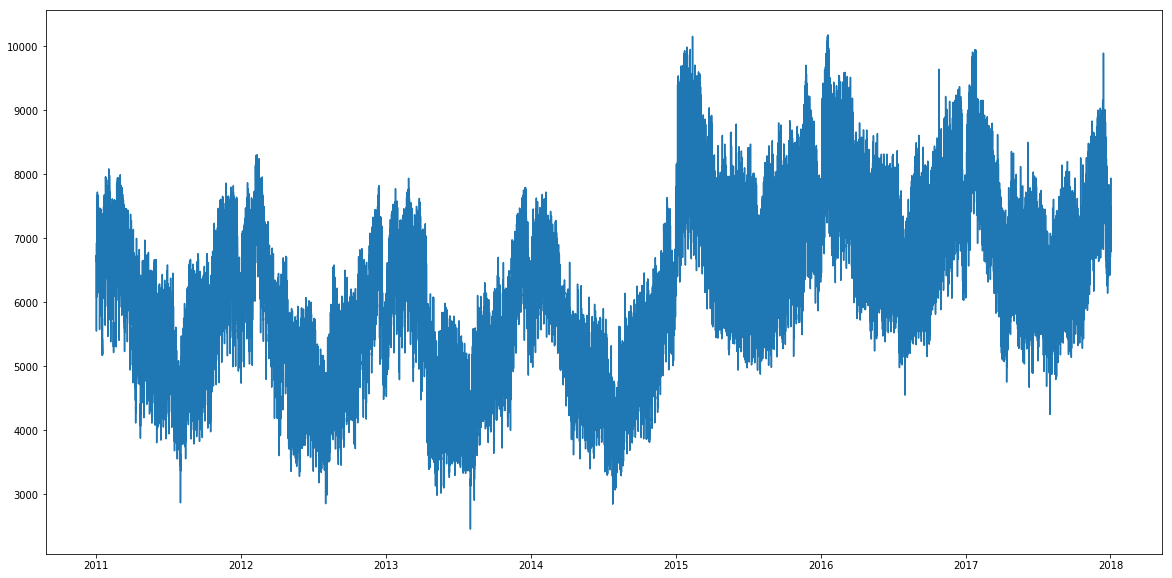

In [121]:
plt.figure(figsize=(20, 10))
plt.plot(df.CH_load_entsoe_power_statistics['2011-01-01':'2018-01-01'])

In [383]:
# добавим словарей для удобства и уменьшения hard-кода и "магических" строк в коде

country_codes = {'AT': 'Austria', 'BG' : 'Belgium', 'CZ' : 'CZech Republic', 'DE' : 'Germany', \
                'FR' : 'France', 'HU' : 'Hungary', 'CH' : 'Switzerland', 'CY' : 'Cyprus'}

def gentag(ccode):
    return '_'.join([ccode, 'load_entsoe_power_statistics'])

In [314]:
df.columns.values

array(['utc_timestamp', 'cet_cest_timestamp',
       'AL_load_entsoe_power_statistics',
       'AT_load_entsoe_power_statistics', 'AT_load_entsoe_transparency',
       'AT_solar_generation_actual', 'AT_wind_onshore_generation_actual',
       'BA_load_entsoe_power_statistics', 'BA_load_entsoe_transparency',
       'BE_load_entsoe_power_statistics', 'BE_load_entsoe_transparency',
       'BE_price_day_ahead', 'BE_solar_generation_actual',
       'BE_wind_offshore_generation_actual',
       'BE_wind_onshore_generation_actual',
       'BG_load_entsoe_power_statistics', 'BG_load_entsoe_transparency',
       'BG_price_day_ahead', 'BG_solar_generation_actual',
       'BG_wind_onshore_generation_actual',
       'CH_load_entsoe_power_statistics', 'CH_load_entsoe_transparency',
       'CH_price_day_ahead', 'CH_solar_generation_actual',
       'CH_wind_onshore_generation_actual',
       'CS_load_entsoe_power_statistics',
       'CY_load_entsoe_power_statistics', 'CY_load_entsoe_transparency',
    

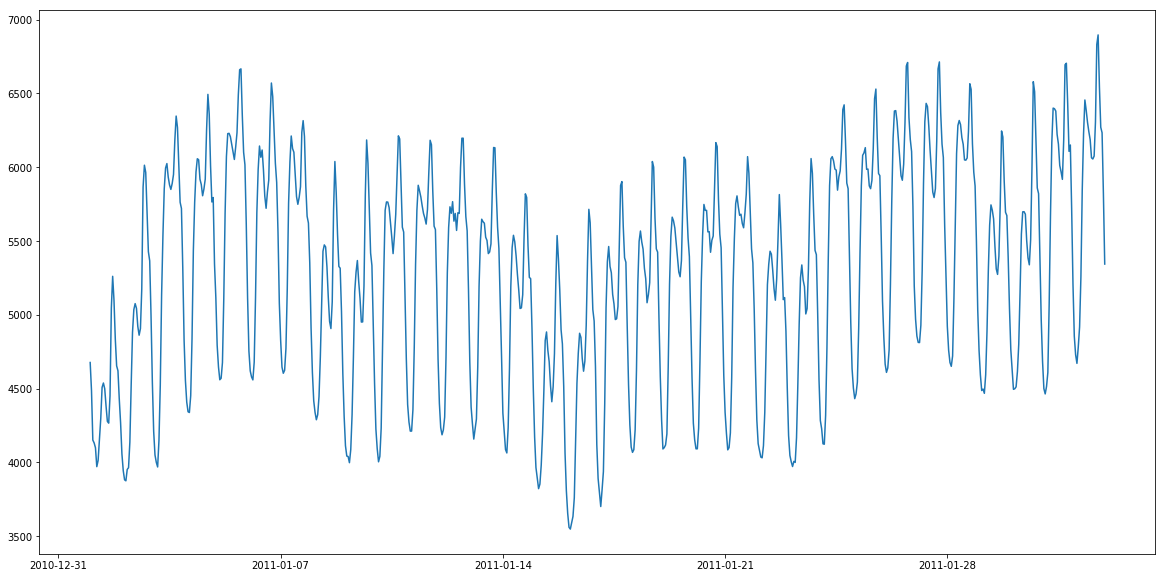

In [119]:
# Посмотрим на более короткие отрезки, чтобы лучше увидеть детали
plt.figure(figsize=(20, 10))
plt.plot(df.BG_load_entsoe_power_statistics['2011-01-01':'2011-02-01'])

### Посмотрим на распреление потребления 
### Можно сэмплировать различные годы для оценки того, насколько устойчиво распределение

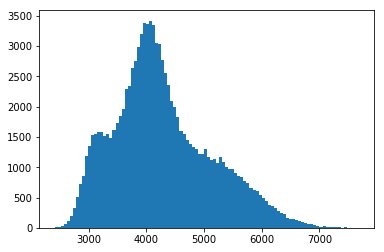

In [118]:
# все годы
plt.hist(df.BG_load_entsoe_power_statistics['2001-01-01':'2018-01-01'], bins=100);

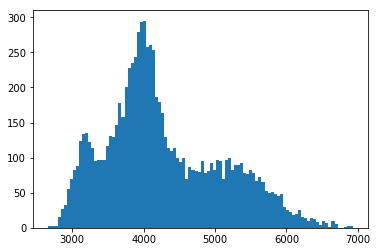

In [62]:
# 2007
plt.hist(df.BG_load_entsoe_power_statistics['2006-01-01':'2007-01-01'], bins=100);

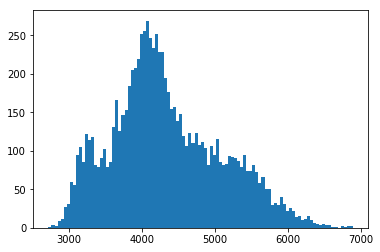

In [63]:
# 2008
plt.hist(df.BG_load_entsoe_power_statistics['2007-01-01':'2008-01-01'], bins=100);

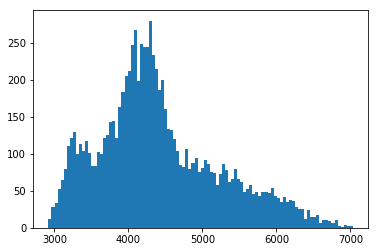

In [76]:
# 2009
plt.hist(df.BG_load_entsoe_power_statistics['2008-01-01':'2009-01-01'], bins=100);

In [925]:
# визуально видно, что в целом трехмодальность сохраняется

In [442]:
def get_week(x):
    return ((x - datetime(x.year,1,1)).days + datetime(x.year,1,1).weekday()) // 7 + 1

# добавим календарные признаки в датасет
df['year'] = df.dt.apply(lambda r: r.year)
df['month'] = df.dt.apply(lambda r: r.month)
df['day'] = df.dt.apply(lambda r: r.day)
df['weekday'] = df.dt.apply(lambda r: r.weekday())
df['week'] = df.dt.apply(get_week)
df['hour'] = df.dt.apply(lambda r: r.hour)

### Посмотрим на арегированные данные - по дням, неделям, месяцам

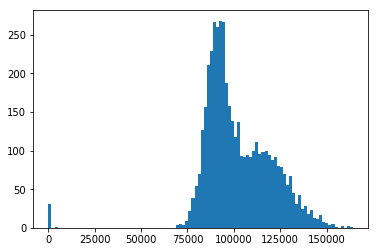

In [113]:
df_daily = df.resample('D').sum()
plt.hist(df_daily.BG_load_entsoe_power_statistics.dropna(), bins=100);

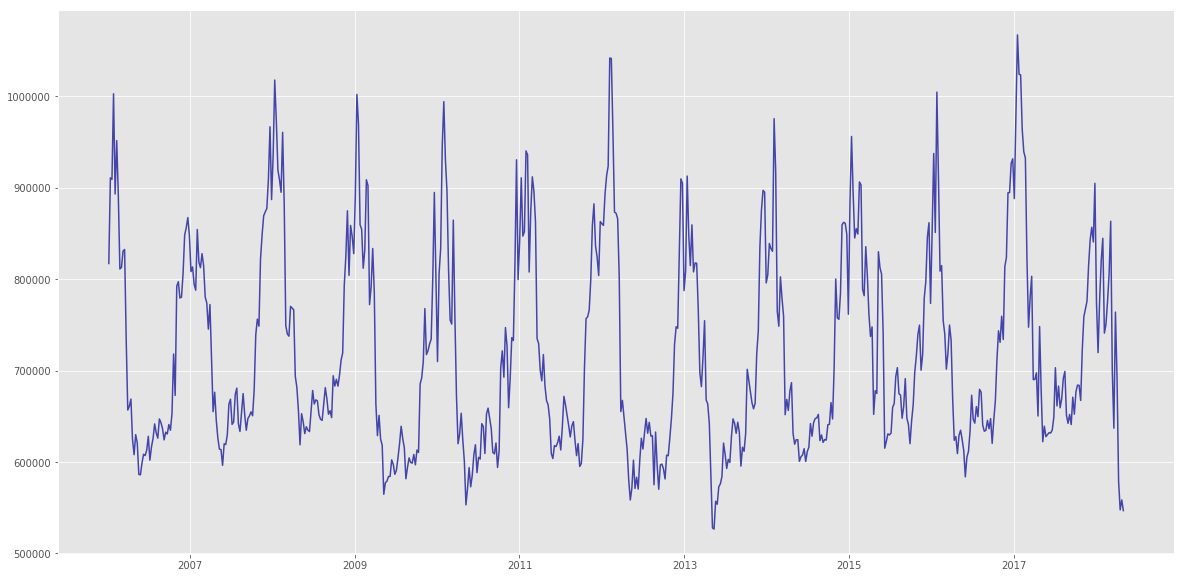

In [341]:
df_monthly = df.resample('M').sum()
tag = 'BG_load_entsoe_power_statistics'
low_limit = df_weekly[tag].mean() - 2 * df_weekly[tag].std()
plt.plot(df_weekly[tag][df_weekly[tag] > low_limit].dropna(), color=base_color);

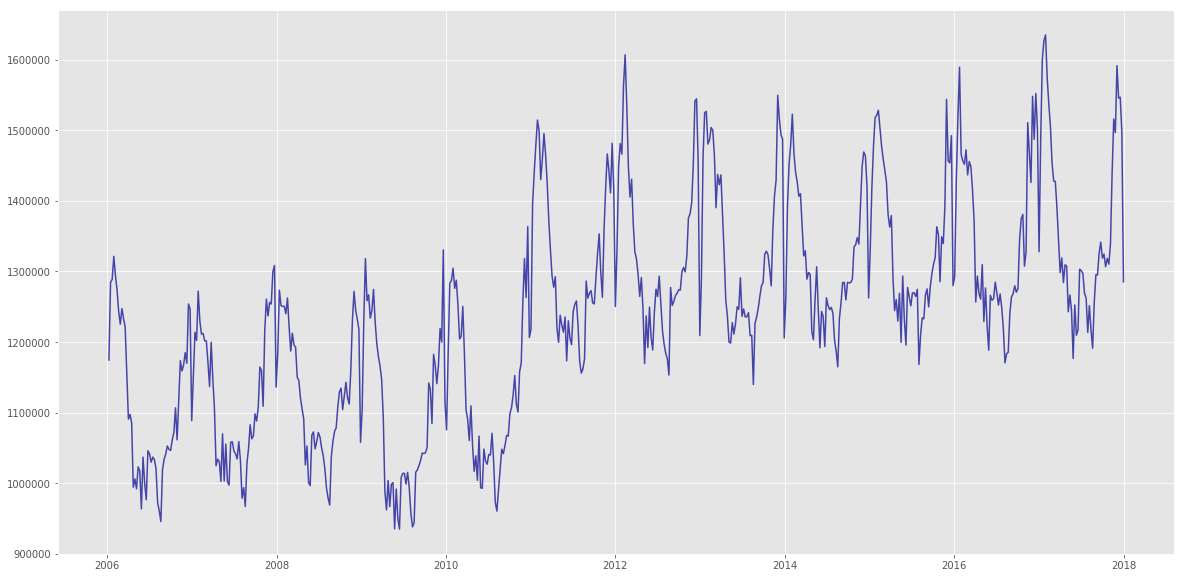

In [340]:
df_monthly = df.resample('M').sum()
tag = 'AT_load_entsoe_power_statistics'
low_limit = df_weekly[tag].mean() - 2 * df_weekly[tag].std()
plt.plot(df_weekly[tag][df_weekly[tag] > low_limit].dropna(), color=base_color);

### Изучим визуально наличие сезонность с помощью пострения графиков автокорреляционных функций

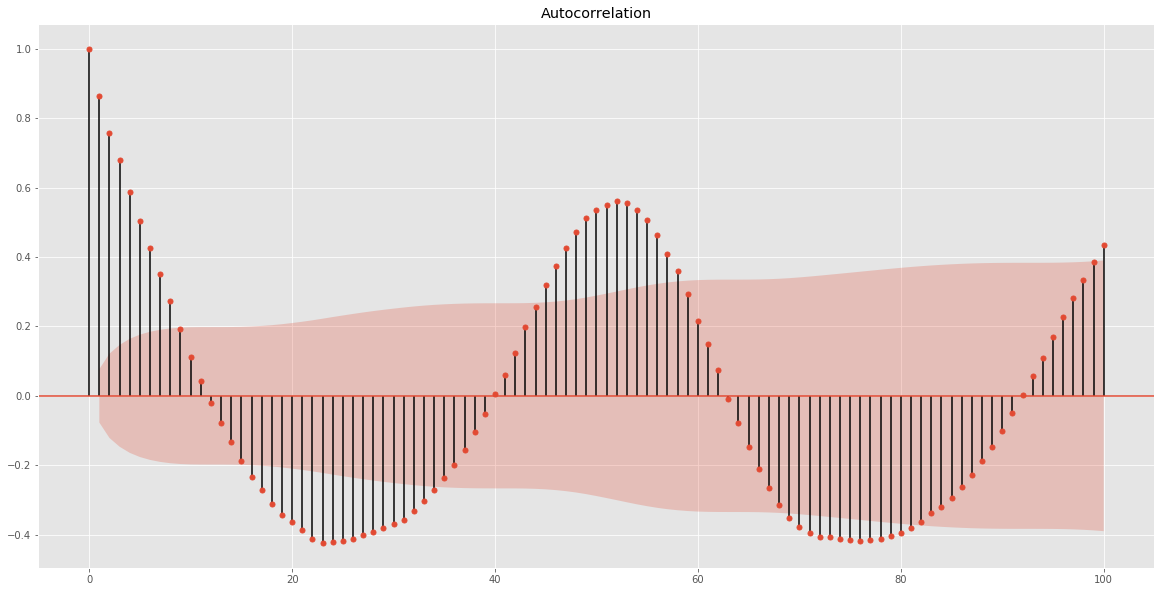

In [329]:
# plt.style.use('ggplot')
# здесь видим выраженную годовую сезонность не недельных агрегатах в районе 55 недель
plt.rcParams['figure.figsize'] = (20, 10)
plot_acf(df_weekly.BG_load_entsoe_power_statistics.dropna(), lags=100);

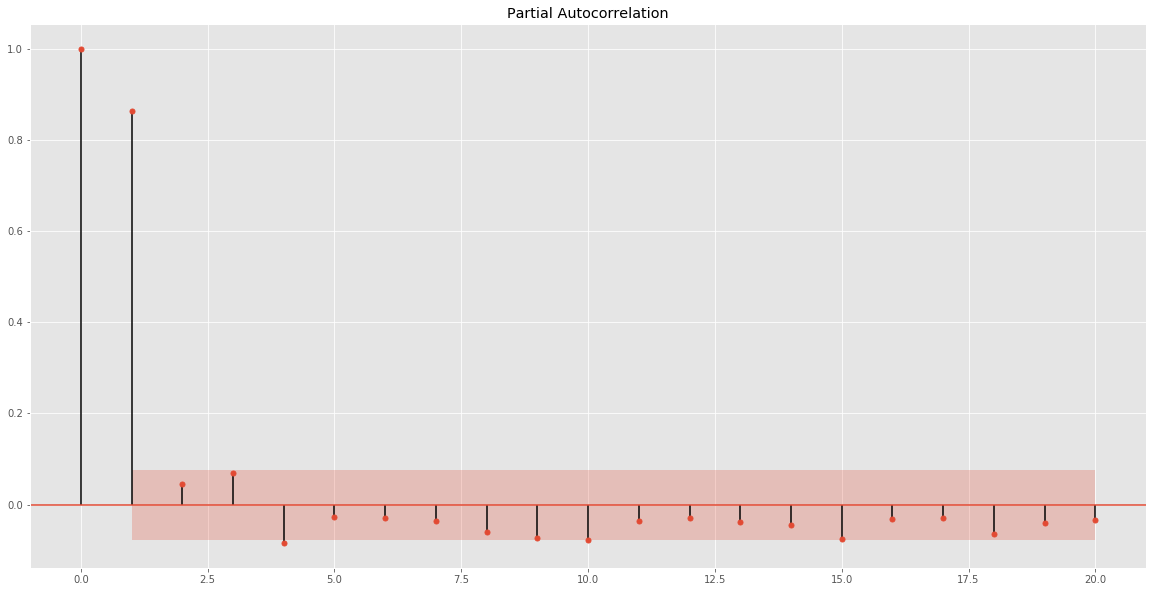

In [151]:
# plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 10)
plot_pacf(df_weekly.BG_load_entsoe_power_statistics.dropna(), lags=20);

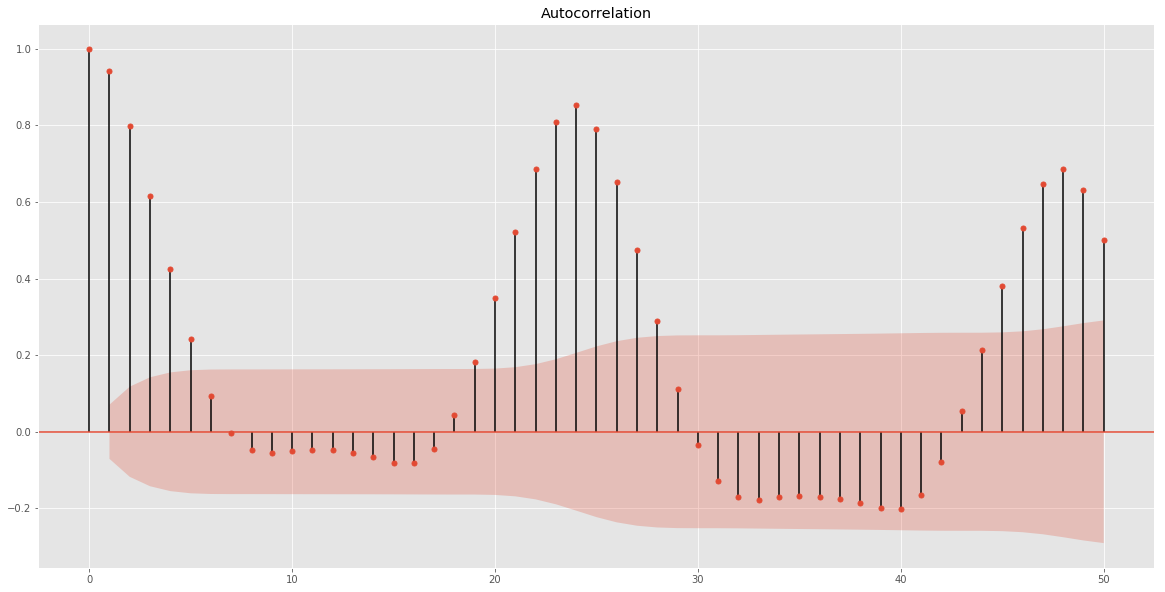

In [152]:
# Это часовой датасет, здесь видно внутредневные колебания и выраженную суточную сезонность
plt.rcParams['figure.figsize'] = (20, 10)
plot_acf(df.BG_load_entsoe_power_statistics['2011-01-01':'2011-02-01'].dropna(), lags=50);

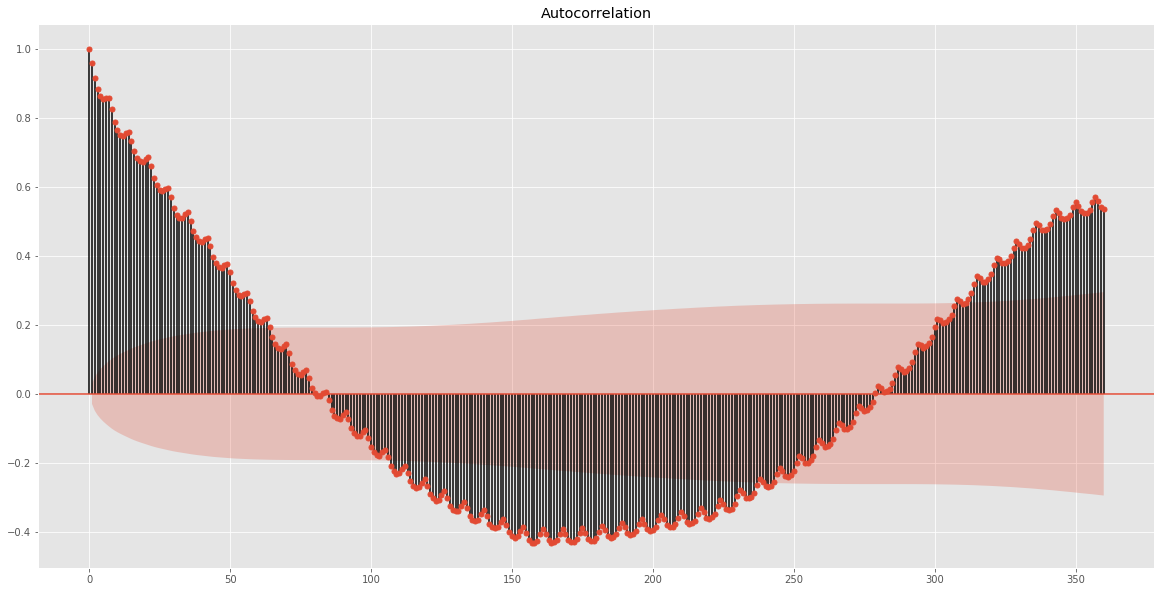

In [155]:
# plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 10)
plot_acf(df_daily.BG_load_entsoe_power_statistics.dropna(), lags=360);

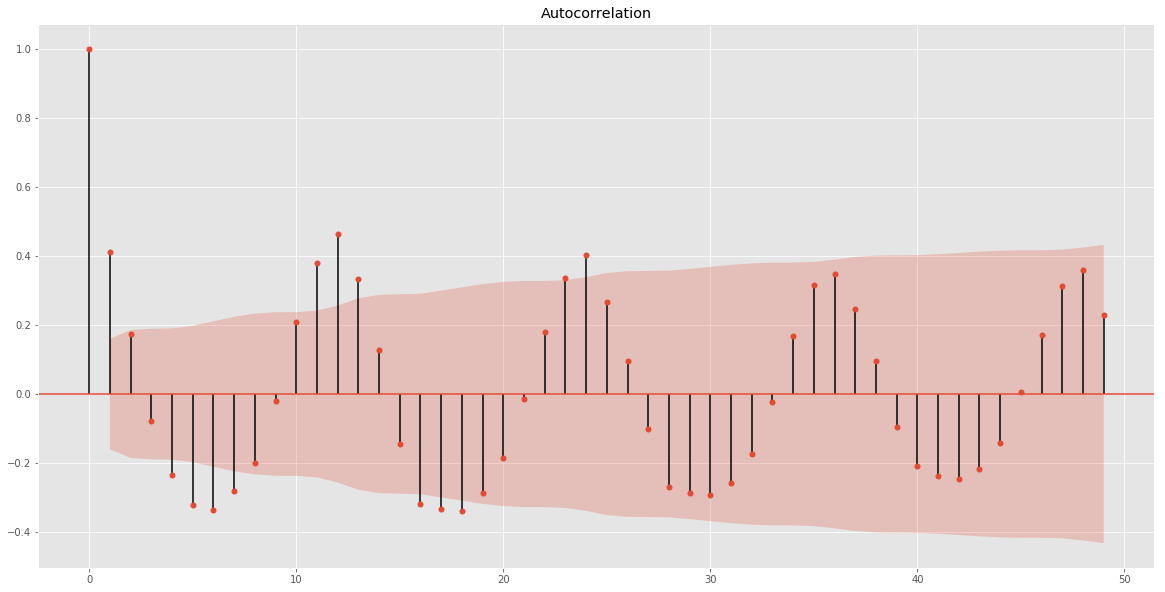

In [162]:
# Снова годовая сезонность - на месячных агрегатах видно нагляднее
plt.rcParams['figure.figsize'] = (20, 10)
plot_acf(df_monthly.BG_load_entsoe_power_statistics.dropna(), lags=49);

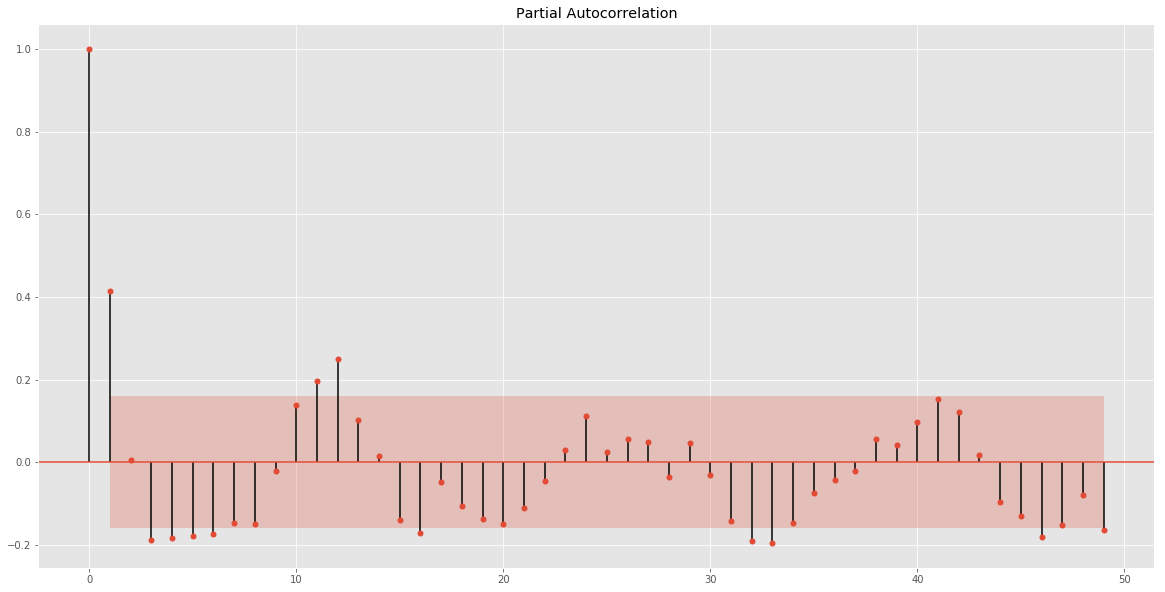

In [165]:
# plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 10)
plot_pacf(df_monthly.BG_load_entsoe_power_statistics.dropna(), lags=49);

In [349]:
from scipy import stats

### Проведем сравнителный анализ профилей потребления в разных странах

Из интересного - видно, что профили у Германии и Франции сильно различаются:
- среднее потребление примерно одинаковое
- при этом у Франции внутригодовые колебания потребления гораздо выше

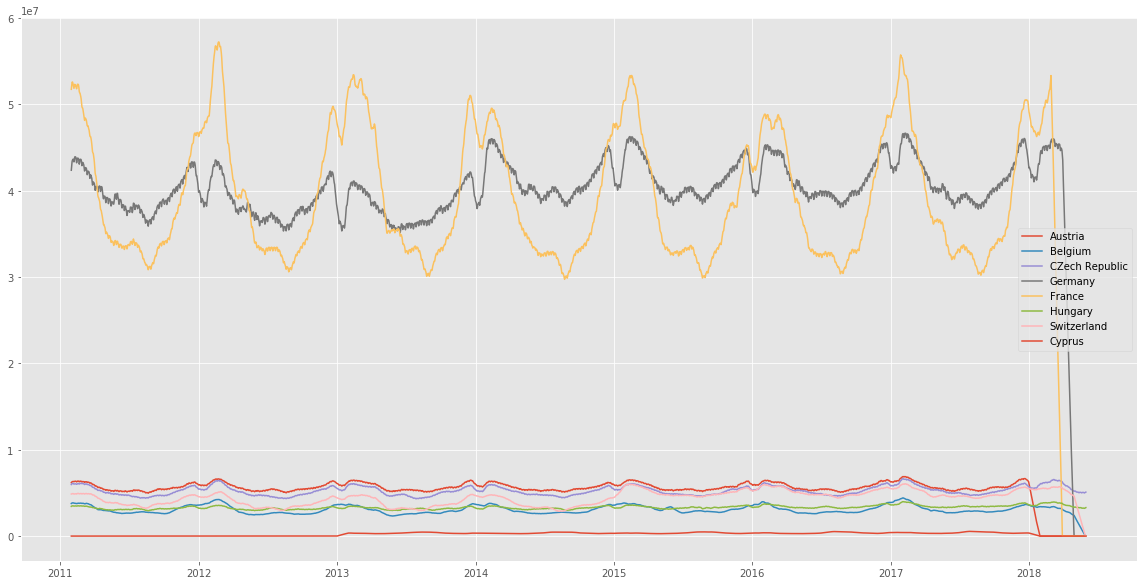

In [387]:
_df = df_daily
legend = []
for _code, _country in country_codes.items():
    plt.plot(_df[gentag(_code)]['2011-01-01':].rolling(30).sum())
    legend.append(_country)
plt.legend(legend)

### Проверка статистических гипотез

Посмотрим насколько коррелирует потребление электроэнергии выборочно в разных странах - какие-то корреляции видны визуально, но нужно удостовериться, посмотрев на коэффициент и <b>p-value</b>

In [924]:
for _c1, _c2 in [('AT', 'BG'), ('BG', 'DE'), ('CZ', 'CY')]:
    corr = stats.pearsonr(_df[gentag(_c1)]['2011-01-01':'2018-01-01'].rolling(30).sum().dropna(), _df[gentag(_c2)]['2011-01-01':'2018-01-01'].rolling(30).sum().dropna())
    print(country_codes[_c1], '-', country_codes[_c2], ':', corr)

Austria - Belgium : (0.8930633303103687, 0.0)
Belgium - Germany : (0.7197104413498105, 0.0)
CZech Republic - Cyprus : (-0.016921765417677932, 0.3949795720378878)


### Видно, что корреляция между потреблением в Австрии и Бельгии достаточно высокая, а между Чехией и Кипром скорее отсутствует

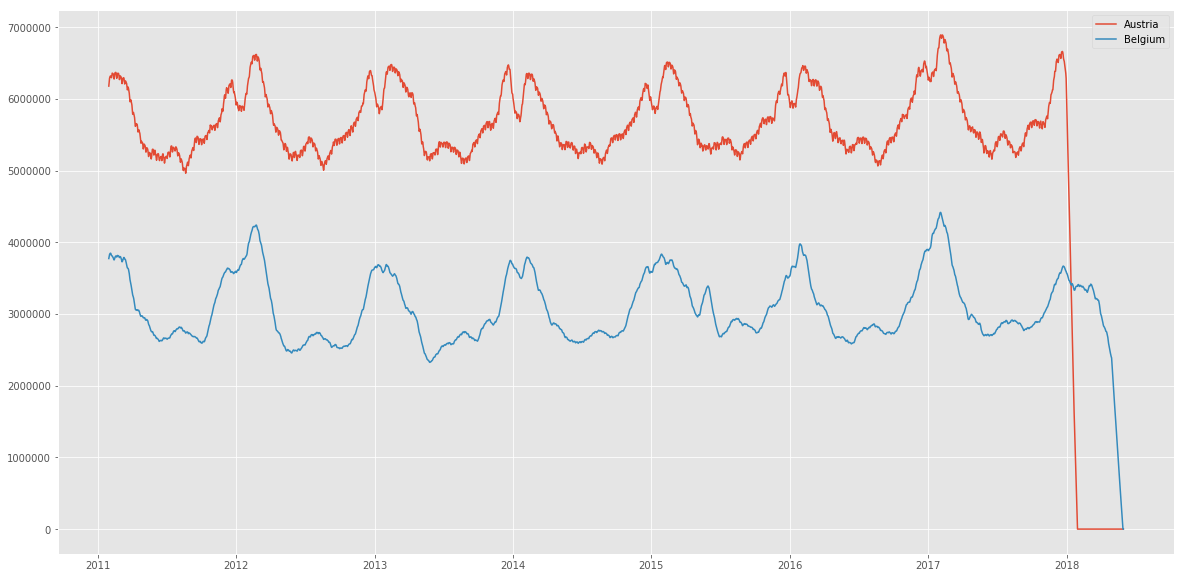

In [731]:
_df = df_daily
legend = []
for _code, _country in country_codes.items():
    if _code not in ['AT', 'BG']:
        continue
    plt.plot(_df[gentag(_code)]['2011-01-01':].rolling(30).sum())
    legend.append(_country)
plt.legend(legend)

### Сформировали представление о характере данных, теперь попробуем использовать инструментарий для анализа с помощью инструментов машинного обучения

#### Построим pivot-представление для дальнейшего изучения и кластерного анализа (pivot - сводная таблица)

In [479]:
# pivot представление с мультииндексом - поменяли на колоночное (ниже)
# pv_table = pd.pivot_table(df, values=gentag('AT'), index=['year', 'week', 'weekday'],
#                     columns=['hour'], aggfunc=np.sum)
# hour_pivot = pv_table.groupby(['year', 'week', 'weekday']).sum().reset_index()

In [532]:
# представление пивота с колонками
# [gentag('AT'), gentag('DE'), gentag('CH')]
pv_table = pd.pivot_table(df, values=gentag('AT'), index=['hour'],
                    columns=["year", "week", "weekday"], aggfunc=np.sum)

In [533]:
# так теперь выглядят наши данные 
pv_table.head()

year    2005    2006                                                          \
week      53      1       2                                                    
weekday    5       6       0       1       2       3       4       5       6   
hour                                                                           
0        NaN  6005.0  5643.0  6192.0  6217.0  6237.0  6138.0  5793.0  5704.0   
1        NaN  5743.0  5524.0  5991.0  6027.0  6065.0  5936.0  5610.0  5550.0   
2        NaN  5397.0  5372.0  5773.0  5802.0  5841.0  5647.0  5377.0  5305.0   
3        NaN  5213.0  5481.0  5849.0  5866.0  5887.0  5568.0  5359.0  5217.0   
4        NaN  5190.0  5941.0  6252.0  6289.0  6283.0  5560.0  5544.0  5301.0   

year            ...  2018                                               
week         3  ...    21                            22                 
weekday       0 ...     1    2    3    4    5    6    0    1    2    3  
hour            ...                                                     
0        6022.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1        5892.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2        5732.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3        5812.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4        6412.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 4535 columns]

In [534]:
# # Для удобства пока оставим один атрибут - Австрию, потом можно будет поменять механизм
# selected_cols = [ col for col in pv_table.columns \
#                     if col[0] in [gentag('AT')]]
# pv_table = pv_table[selected_cols]

In [537]:
pv_table.head()

year    2005    2006                                                          \
week      53      1       2                                                    
weekday    5       6       0       1       2       3       4       5       6   
hour                                                                           
0        NaN  6005.0  5643.0  6192.0  6217.0  6237.0  6138.0  5793.0  5704.0   
1        NaN  5743.0  5524.0  5991.0  6027.0  6065.0  5936.0  5610.0  5550.0   
2        NaN  5397.0  5372.0  5773.0  5802.0  5841.0  5647.0  5377.0  5305.0   
3        NaN  5213.0  5481.0  5849.0  5866.0  5887.0  5568.0  5359.0  5217.0   
4        NaN  5190.0  5941.0  6252.0  6289.0  6283.0  5560.0  5544.0  5301.0   

year            ...  2018                                               
week         3  ...    21                            22                 
weekday       0 ...     1    2    3    4    5    6    0    1    2    3  
hour            ...                                                     
0        6022.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1        5892.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2        5732.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3        5812.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4        6412.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 4535 columns]

In [543]:
# такое представление нам тоже потом может пригодиться
pv_table.T.reset_index().head()

hour,year,week,weekday,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,2005,53,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6297.0
1,2006,1,6,6005.0,5743.0,5397.0,5213.0,5190.0,4916.0,5158.0,...,6231.0,6603.0,6979.0,7022.0,6930.0,6560.0,6170.0,6501.0,6168.0,5900.0
2,2006,2,0,5643.0,5524.0,5372.0,5481.0,5941.0,6459.0,7352.0,...,8168.0,8469.0,8735.0,8617.0,8218.0,7773.0,7247.0,7413.0,6926.0,6483.0
3,2006,2,1,6192.0,5991.0,5773.0,5849.0,6252.0,6685.0,7480.0,...,8055.0,8342.0,8670.0,8534.0,8203.0,7745.0,7214.0,7397.0,6981.0,6522.0
4,2006,2,2,6217.0,6027.0,5802.0,5866.0,6289.0,6730.0,7554.0,...,8081.0,8331.0,8470.0,8460.0,8185.0,7759.0,7242.0,7441.0,6981.0,6575.0


(4535, 27)
[5872. 5594. 5201. 5040. 5038. 4831. 5014. 5206. 5592. 5966. 6204. 6138.
 6097. 6025. 6083. 6466. 6791. 6856. 6724. 6443. 6063. 6377. 5967. 5688.]
[5383. 5224. 5062. 5239. 5774. 6420. 7294. 7754. 8053. 8096. 8249. 8180.
 8173. 8128. 8149. 8539. 8714. 8619. 8243. 7796. 7309. 7506. 6993. 6534.]


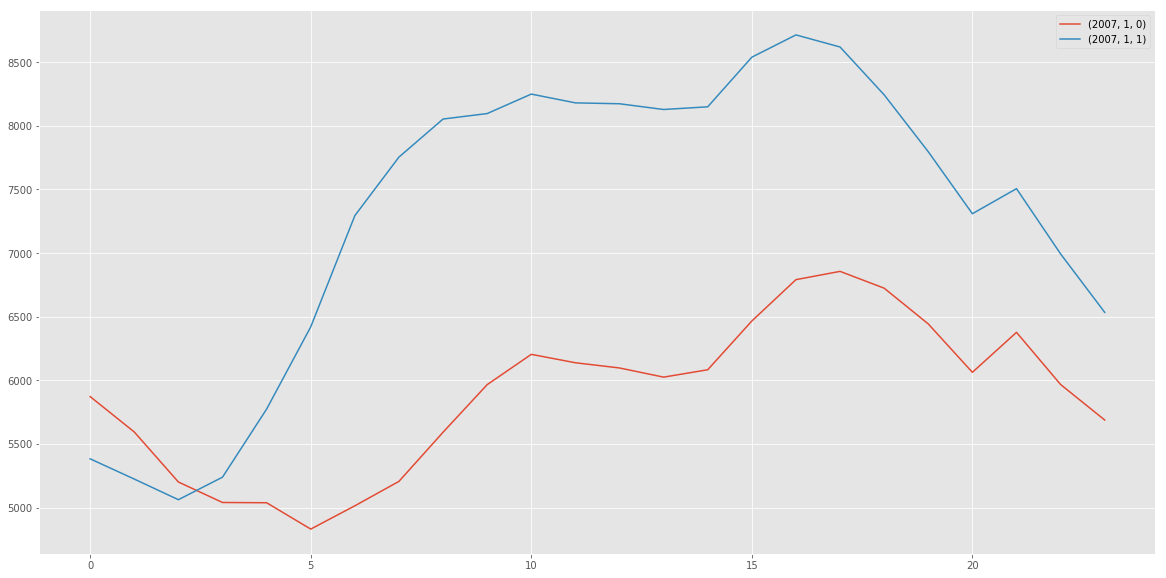

In [544]:
# проверим, чего из этого получилось

lines = pv_table
print(hour_pivot.shape)
selected_cols = [ col for col in lines.columns \
                    if  col[0] in [2007] and \
                        col[1] in [1] and \
                        col[2] in [0, 1]]
lines = lines[selected_cols]

print(np.array(lines.iloc[:, 0]))
print(np.array(lines.iloc[:, 1]))

# # lines = lines.iloc[lines.index.isin([0], level=0)]
# # lines = lines.iloc[lines.index.isin(range(1,15), level=1)]

plt.plot(lines.index, lines);
plt.legend([col for col in lines.columns])


In [545]:
# посмотрим глазами на цифры
lines.T

hour                   0       1       2       3       4       5       6   \
year week weekday                                                           
2007 1    0        5872.0  5594.0  5201.0  5040.0  5038.0  4831.0  5014.0   
          1        5383.0  5224.0  5062.0  5239.0  5774.0  6420.0  7294.0   

hour                   7       8       9    ...        14      15      16  \
year week weekday                           ...                             
2007 1    0        5206.0  5592.0  5966.0   ...    6083.0  6466.0  6791.0   
          1        7754.0  8053.0  8096.0   ...    8149.0  8539.0  8714.0   

hour                   17      18      19      20      21      22      23  
year week weekday                                                          
2007 1    0        6856.0  6724.0  6443.0  6063.0  6377.0  5967.0  5688.0  
          1        8619.0  8243.0  7796.0  7309.0  7506.0  6993.0  6534.0  

[2 rows x 24 columns]

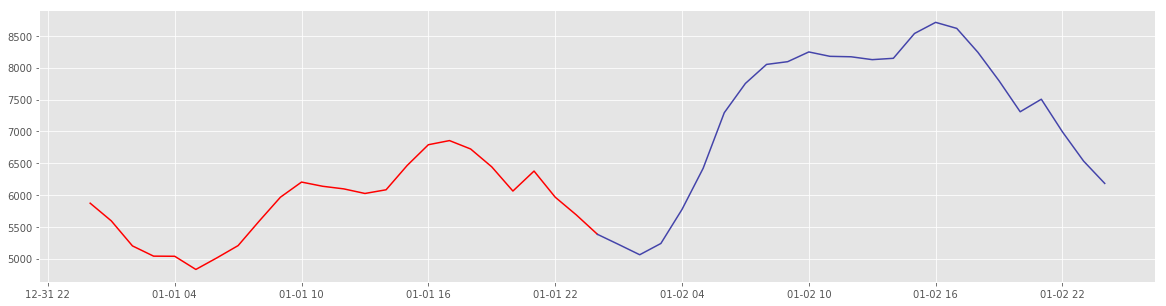

In [546]:
# проверим, что не испортили данные после преобразования
plot_days(df[gentag('AT')], '2007-01-01', 2)

### Убедились, что данные в исходном датасете и в сводной таблице совпадают - можно работать дальше

In [552]:
# TODO - сделать функцию восстановления даты по году, номеру недели и номеру дня
def restore_date_by_num(y, w, d):
    return datetime(y, 1, 1) + timedelta(days=(w - 1) * 7 + d)

In [562]:
restore_date_by_num(2007, 1, 0)

datetime.datetime(2007, 1, 1, 0, 0)

In [563]:
# теперь с таким удобным представлением легко можно сравнительно посмотреть на профили разных дней глазами, так и попробовать pca и механизмы кластеризации

In [569]:
# посмотрим на понедельники

lines = pv_table
print(hour_pivot.shape)
selected_cols = [ col for col in lines.columns \
                    if  col[0] in [2007] and \
                        col[2] in [0]]
lines = lines[selected_cols]

lines

(4535, 27)


year       2007                                                          \
week         1       2       3       4       5       6       7       8    
weekday       0       0       0       0       0       0       0       0   
hour                                                                      
0        5872.0  5604.0  5573.0  5652.0  6009.0  5862.0  5676.0  5815.0   
1        5594.0  5522.0  5521.0  5592.0  5871.0  5775.0  5555.0  5743.0   
2        5201.0  5398.0  5415.0  5498.0  5773.0  5632.0  5412.0  5641.0   
3        5040.0  5529.0  5563.0  5642.0  5893.0  5745.0  5617.0  5768.0   
4        5038.0  6189.0  6205.0  6308.0  6488.0  6344.0  6266.0  6372.0   
5        4831.0  7238.0  7225.0  7327.0  7460.0  7266.0  7212.0  7284.0   
6        5014.0  8224.0  8218.0  8291.0  8373.0  8118.0  7869.0  8123.0   
7        5206.0  8405.0  8296.0  8413.0  8543.0  8296.0  8166.0  8487.0   
8        5592.0  8340.0  8196.0  8440.0  8647.0  8337.0  8241.0  8458.0   
9        5966.0  8354.0  8282.0  8503.0  8715.0  8365.0  8343.0  8534.0   
10       6204.0  8480.0  8306.0  8608.0  8817.0  8428.0  8445.0  8557.0   
11       6138.0  8306.0  8066.0  8379.0  8610.0  8135.0  8196.0  8289.0   
12       6097.0  8325.0  8036.0  8365.0  8591.0  8077.0  8173.0  8253.0   
13       6025.0  8265.0  7970.0  8327.0  8531.0  7962.0  8061.0  8119.0   
14       6083.0  8197.0  7870.0  8257.0  8456.0  7862.0  8032.0  8097.0   
15       6466.0  8479.0  8165.0  8425.0  8572.0  7970.0  8110.0  8027.0   
16       6791.0  8870.0  8652.0  8754.0  8898.0  8483.0  8450.0  8506.0   
17       6856.0  8765.0  8545.0  8641.0  8838.0  8608.0  8541.0  8676.0   
18       6724.0  8419.0  8245.0  8229.0  8470.0  8260.0  8199.0  8365.0   
19       6443.0  7952.0  7818.0  7902.0  8045.0  7781.0  7809.0  7886.0   
20       6063.0  7417.0  7310.0  7336.0  7449.0  7274.0  7230.0  7346.0   
21       6377.0  7421.0  7314.0  7396.0  7491.0  7339.0  7278.0  7349.0   
22       5967.0  6887.0  6787.0  6841.0  7030.0  6803.0  6739.0  6811.0   
23       5688.0  6457.0  6445.0  6411.0  6719.0  6513.0  6361.0  6486.0   

year                      ...                                            \
week         9       10   ...        44      45      46      47      48   
weekday       0       0   ...         0       0       0       0       0   
hour                      ...                                             
0        5697.0  5637.0   ...    5411.0  5364.0  5696.0  6078.0  5792.0   
1        5610.0  5539.0   ...    5312.0  5279.0  5595.0  5965.0  5665.0   
2        5486.0  5440.0   ...    5244.0  5215.0  5505.0  5853.0  5557.0   
3        5649.0  5594.0   ...    5424.0  5392.0  5646.0  5995.0  5733.0   
4        6283.0  6268.0   ...    6106.0  6085.0  6332.0  6654.0  6449.0   
5        7307.0  7225.0   ...    6955.0  7118.0  7398.0  7650.0  7524.0   
6        8137.0  7960.0   ...    7649.0  7704.0  8097.0  8281.0  8340.0   
7        8370.0  8299.0   ...    7917.0  7891.0  8331.0  8497.0  8537.0   
8        8437.0  8366.0   ...    7887.0  7915.0  8349.0  8499.0  8457.0   
9        8519.0  8252.0   ...    7974.0  8008.0  8451.0  8559.0  8582.0   
10       8601.0  8305.0   ...    8052.0  8114.0  8564.0  8546.0  8692.0   
11       8375.0  8079.0   ...    7801.0  7870.0  8417.0  8296.0  8476.0   
12       8331.0  8055.0   ...    7731.0  7849.0  8473.0  8306.0  8524.0   
13       8360.0  8088.0   ...    7673.0  7819.0  8549.0  8223.0  8476.0   
14       8237.0  7971.0   ...    7603.0  7739.0  8580.0  8281.0  8630.0   
15       8249.0  7990.0   ...    7723.0  7993.0  8755.0  8635.0  8853.0   
16       8398.0  8236.0   ...    8298.0  8520.0  8946.0  8898.0  9056.0   
17       8691.0  8555.0   ...    8248.0  8469.0  8817.0  8743.0  8891.0   
18       8303.0  8275.0   ...    7884.0  8146.0  8454.0  8334.0  8543.0   
19       7842.0  7731.0   ...    7347.0  7716.0  7981.0  7849.0  8200.0   
20       7266.0  7185.0   ...    6776.0  7221.0  7521.0  7434.0  7645.0   
21       7255.0  7163.0 

In [586]:
lines.groupby('hour').mean()

year       2007                                                          \
week         1       2       3       4       5       6       7       8    
weekday       0       0       0       0       0       0       0       0   
hour                                                                      
0        5872.0  5604.0  5573.0  5652.0  6009.0  5862.0  5676.0  5815.0   
1        5594.0  5522.0  5521.0  5592.0  5871.0  5775.0  5555.0  5743.0   
2        5201.0  5398.0  5415.0  5498.0  5773.0  5632.0  5412.0  5641.0   
3        5040.0  5529.0  5563.0  5642.0  5893.0  5745.0  5617.0  5768.0   
4        5038.0  6189.0  6205.0  6308.0  6488.0  6344.0  6266.0  6372.0   
5        4831.0  7238.0  7225.0  7327.0  7460.0  7266.0  7212.0  7284.0   
6        5014.0  8224.0  8218.0  8291.0  8373.0  8118.0  7869.0  8123.0   
7        5206.0  8405.0  8296.0  8413.0  8543.0  8296.0  8166.0  8487.0   
8        5592.0  8340.0  8196.0  8440.0  8647.0  8337.0  8241.0  8458.0   
9        5966.0  8354.0  8282.0  8503.0  8715.0  8365.0  8343.0  8534.0   
10       6204.0  8480.0  8306.0  8608.0  8817.0  8428.0  8445.0  8557.0   
11       6138.0  8306.0  8066.0  8379.0  8610.0  8135.0  8196.0  8289.0   
12       6097.0  8325.0  8036.0  8365.0  8591.0  8077.0  8173.0  8253.0   
13       6025.0  8265.0  7970.0  8327.0  8531.0  7962.0  8061.0  8119.0   
14       6083.0  8197.0  7870.0  8257.0  8456.0  7862.0  8032.0  8097.0   
15       6466.0  8479.0  8165.0  8425.0  8572.0  7970.0  8110.0  8027.0   
16       6791.0  8870.0  8652.0  8754.0  8898.0  8483.0  8450.0  8506.0   
17       6856.0  8765.0  8545.0  8641.0  8838.0  8608.0  8541.0  8676.0   
18       6724.0  8419.0  8245.0  8229.0  8470.0  8260.0  8199.0  8365.0   
19       6443.0  7952.0  7818.0  7902.0  8045.0  7781.0  7809.0  7886.0   
20       6063.0  7417.0  7310.0  7336.0  7449.0  7274.0  7230.0  7346.0   
21       6377.0  7421.0  7314.0  7396.0  7491.0  7339.0  7278.0  7349.0   
22       5967.0  6887.0  6787.0  6841.0  7030.0  6803.0  6739.0  6811.0   
23       5688.0  6457.0  6445.0  6411.0  6719.0  6513.0  6361.0  6486.0   

year                      ...                                            \
week         9       10   ...        44      45      46      47      48   
weekday       0       0   ...         0       0       0       0       0   
hour                      ...                                             
0        5697.0  5637.0   ...    5411.0  5364.0  5696.0  6078.0  5792.0   
1        5610.0  5539.0   ...    5312.0  5279.0  5595.0  5965.0  5665.0   
2        5486.0  5440.0   ...    5244.0  5215.0  5505.0  5853.0  5557.0   
3        5649.0  5594.0   ...    5424.0  5392.0  5646.0  5995.0  5733.0   
4        6283.0  6268.0   ...    6106.0  6085.0  6332.0  6654.0  6449.0   
5        7307.0  7225.0   ...    6955.0  7118.0  7398.0  7650.0  7524.0   
6        8137.0  7960.0   ...    7649.0  7704.0  8097.0  8281.0  8340.0   
7        8370.0  8299.0   ...    7917.0  7891.0  8331.0  8497.0  8537.0   
8        8437.0  8366.0   ...    7887.0  7915.0  8349.0  8499.0  8457.0   
9        8519.0  8252.0   ...    7974.0  8008.0  8451.0  8559.0  8582.0   
10       8601.0  8305.0   ...    8052.0  8114.0  8564.0  8546.0  8692.0   
11       8375.0  8079.0   ...    7801.0  7870.0  8417.0  8296.0  8476.0   
12       8331.0  8055.0   ...    7731.0  7849.0  8473.0  8306.0  8524.0   
13       8360.0  8088.0   ...    7673.0  7819.0  8549.0  8223.0  8476.0   
14       8237.0  7971.0   ...    7603.0  7739.0  8580.0  8281.0  8630.0   
15       8249.0  7990.0   ...    7723.0  7993.0  8755.0  8635.0  8853.0   
16       8398.0  8236.0   ...    8298.0  8520.0  8946.0  8898.0  9056.0   
17       8691.0  8555.0   ...    8248.0  8469.0  8817.0  8743.0  8891.0   
18       8303.0  8275.0   ...    7884.0  8146.0  8454.0  8334.0  8543.0   
19       7842.0  7731.0   ...    7347.0  7716.0  7981.0  7849.0  8200.0   
20       7266.0  7185.0   ...    6776.0  7221.0  7521.0  7434.0  7645.0   
21       7255.0  7163.0 

In [ ]:
# посмотрим среднее потребление за 2007 год по дням недели

In [575]:
pv_table_flat = pv_table.T.reset_index()

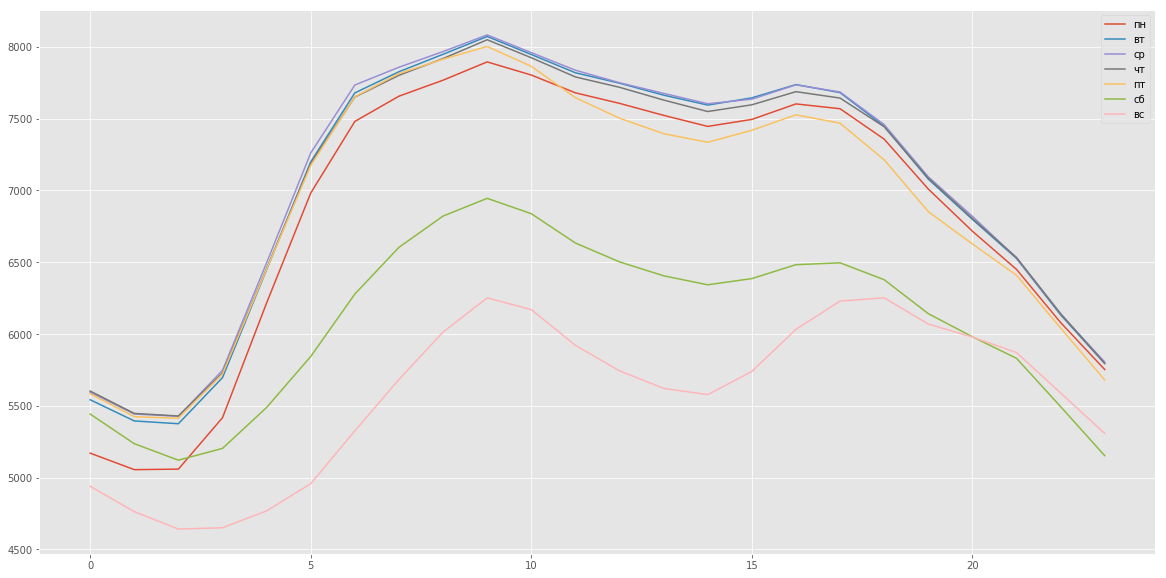

In [611]:
wdays_names = {0:'пн', 1:'вт', 2:'ср', 3:'чт', 4:'пт', 5:'сб', 6:'вс'}
for wd in range(7):
    mean_cons = pv_table_flat[(pv_table_flat.year == 2007) & (pv_table_flat.weekday == wd)].mean().drop(['year', 'week', 'weekday'])
    plt.plot(mean_cons)
    # print(mean_cons)
plt.legend([wdays_names[wd] for wd in range(7)])

In [612]:
# вполне ожидаемо - потребление снижается в выходные и даже чуть-чуть в вечерние часы в пятницу
# TODO -  здесь можно проверить гипотезу! 

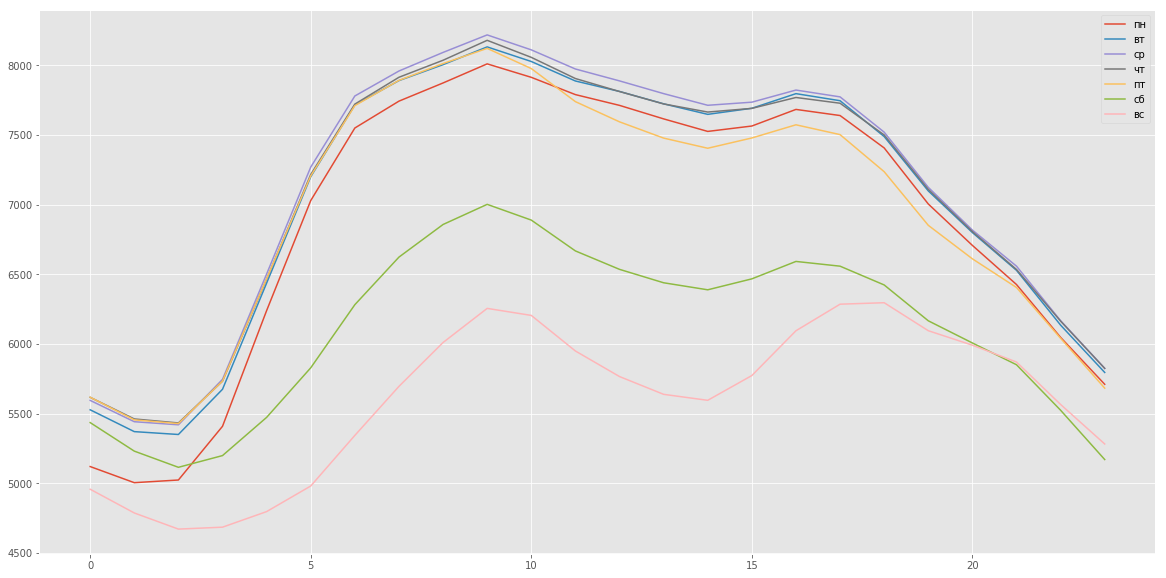

In [613]:
for wd in range(7):
    mean_cons = pv_table_flat[(pv_table_flat.year == 2008) & (pv_table_flat.weekday == wd)].mean().drop(['year', 'week', 'weekday'])
    plt.plot(mean_cons)
    # print(mean_cons)
plt.legend([wdays_names[wd] for wd in range(7)])

In [614]:
# средние профили 2008 года удивительно похожи на 2007, сначала я даже искал ошибку, а потом посмотрел на цифры и понял, 
# что они разные

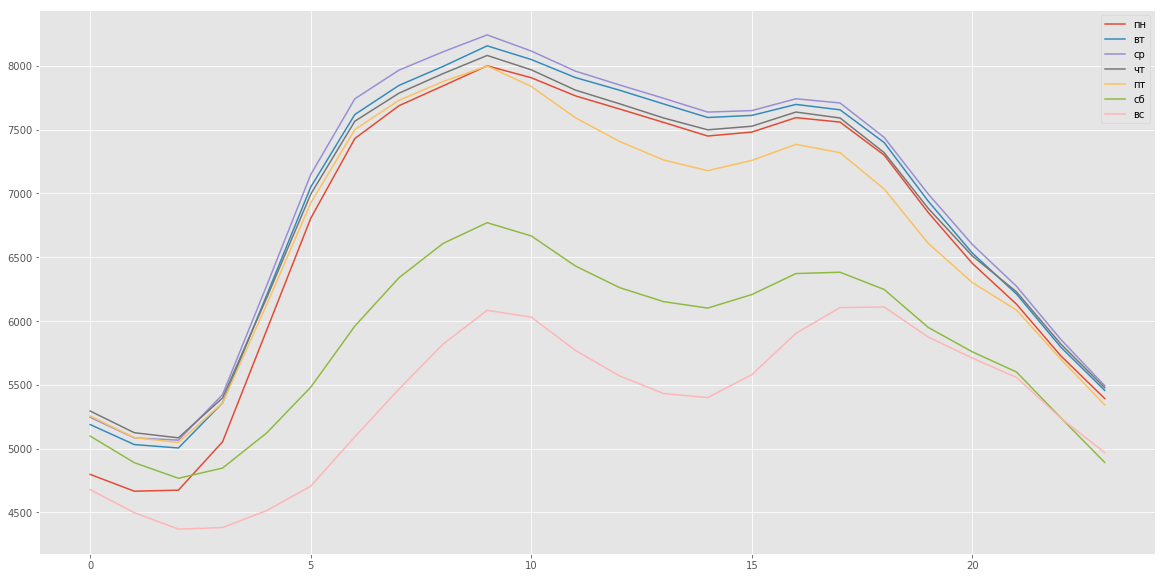

In [615]:
for wd in range(7):
    mean_cons = pv_table_flat[(pv_table_flat.year == 2009) & (pv_table_flat.weekday == wd)].mean().drop(['year', 'week', 'weekday'])
    plt.plot(mean_cons)
    # print(mean_cons)
plt.legend([wdays_names[wd] for wd in range(7)])

In [616]:
# теперь самое интересное, когда мы видим, что дни вполне неплохо укладываются по профилям - попробуем поискать аномалии!
# сначала посмотрим как они кластеризуются

In [617]:
# возьмем 2007 год
lines = pv_table
print(hour_pivot.shape)
selected_cols = [ col for col in lines.columns \
                    if  col[0] in [2007]]
lines = lines[selected_cols]

(4535, 27)


In [630]:
X_data = pv_table_flat[(pv_table_flat.year == 2007)][[c for c in pv_table_flat.columns if c not in ['year', 'week', 'weekday']]]

In [722]:
dates = pv_table_flat.iloc[X_data.index][['year', 'week', 'weekday']].apply(lambda r: restore_date_by_num(int(r.year), int(r.week), int(r.weekday)), axis=1)

In [694]:
from sklearn import decomposition
from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=3, n_init=100)
reduced_data = X_data
print(reduced_data.shape)
kmeans.fit(reduced_data)
date_cluster = kmeans.predict(reduced_data)

(365, 24)


In [695]:
np.unique(date_cluster, return_counts=True)

(array([0, 1, 2], dtype=int32), array([171,  84, 110]))

In [696]:
# Посмотрим, что мы выловили кластеризацией
dates_cluster_2 = dates[date_cluster == 1]

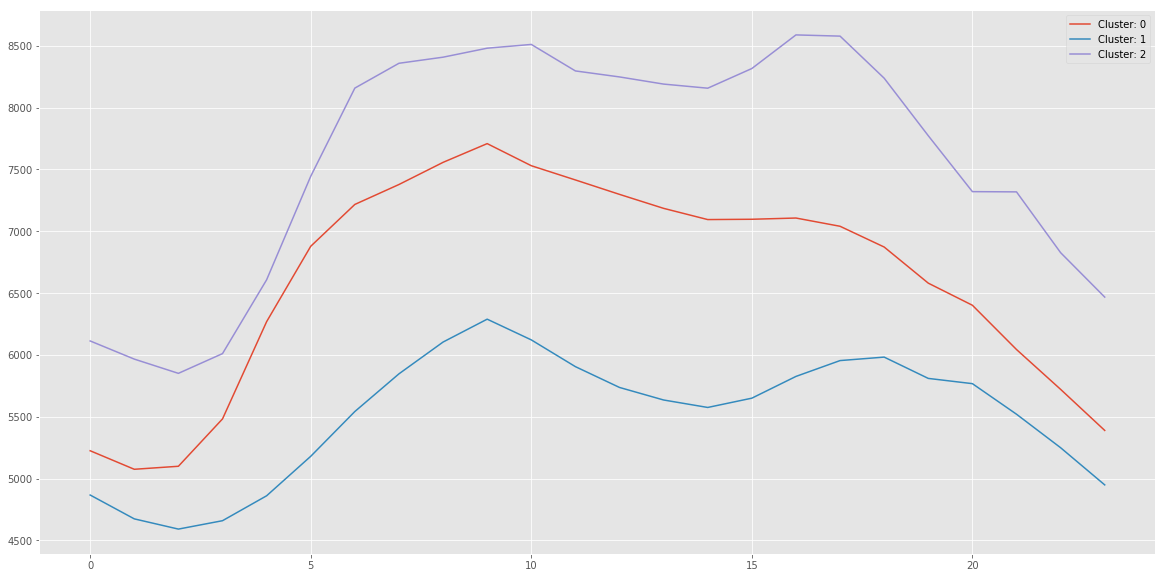

In [733]:
for _clusternum in np.unique(date_cluster):
    _pltdata = X_data[date_cluster == _clusternum].mean()
    plt.plot(_pltdata)
plt.legend([''.join(['Cluster: ', str(_c)]) for _c in np.unique(date_cluster)])

In [698]:
# что-то нашли, но, наверное, не то, что ожидали увидеть, видимо общая тенденция по расходу есть, но вариативность
# довольно высокая
# TODO! посмотрим на вариативность

In [703]:
np.unique(dates[date_cluster == 1].apply(lambda r: r.weekday()), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([ 4,  1,  1,  3,  1, 28, 46]))

In [713]:
# видим, что в этом кластере мы отлично захватили выходные - всего 10 из 84 не попали на выходные,
# интересно посмотреть, что это были за даты
wdays = dates[date_cluster == 1].apply(lambda r: r.weekday())
idx = wdays[(wdays != 5) & (wdays != 6)]

In [730]:
dates[idx.index]

366   2007-01-01
464   2007-04-09
485   2007-04-30
486   2007-05-01
502   2007-05-17
513   2007-05-28
523   2007-06-07
592   2007-08-15
664   2007-10-26
670   2007-11-01
dtype: datetime64[ns]

### Видим, что в кластер "выходного дня" попало 1 января и еще несколько дней - вполне возможно, какие-то праздники
### Идём в Google и смотрим, находим вероятные причины:
- 1 мая -   Праздник труда (День труда) в Австрии
- 28 мая - Вознесение Господне в Австрии
- 7 июня - (<i>возможно, т.к. дата плавающая</i>) День Святого Духа
- 15 августа - Успение Пресвятой Богородицы Девы Марии
- 26 октября - Национальный день Австрийской республики
- 1 ноября - День всех святых

#### Куда можно дальше двигаться:

Очевидно (мы это видели раньше) есть внутригодовые сезонности и это может вносить ошибку, поэтому целесообразно использовать также среди признаков и месяц, возможно, с более высоким весом, чем часовые потребления. Либо кластеризовать отдельно данные по сезонам.

### Прогнозирование потребления

<b>Задача</b>: спрогнозировать потребление электроэнергии в Австрии на 2017 год (за который есть полные данные), основываясь на иторических данных. Попробуем несколько подходов.

В качестве безйлайна возьмем простую модель - предсказываем потребление по предыдущему году. Качество будем по среднему значению <b>RMSE</b>. 
Потом, используя другие подход, попробуем это метрику улучшить.

In [779]:
def rmse(predict, target):
    return np.sqrt(np.mean( (predict - target) ** 2 ))

In [736]:
X_data_2016 = pv_table_flat[(pv_table_flat.year == 2016)][[c for c in pv_table_flat.columns if c not in ['year', 'week', 'weekday']]]
X_data_2017 = pv_table_flat[(pv_table_flat.year == 2017)][[c for c in pv_table_flat.columns if c not in ['year', 'week', 'weekday']]]

In [745]:
# удалим 29 февраля для простоты сравнения (эмулируем предикт)
vis_date = datetime(2016, 2, 29)
delidx = pv_table_flat[(pv_table_flat.year == vis_date.year) & \
              (pv_table_flat.week == get_week(vis_date)) & \
              (pv_table_flat.weekday == vis_date.weekday())].index

In [762]:
X_data_2016 = X_data_2016.loc[X_data_2016.index.drop(delidx)]

In [764]:
X_data_2017.shape, X_data_2016.shape

((365, 24), (365, 24))

In [773]:
X_data_2016.values.flatten().shape, X_data_2017.values.flatten().shape

((8760,), (8760,))

In [786]:
_rmse = rmse(X_data_2016.values.flatten(), X_data_2017.values.flatten())
print(_rmse, _rmse / X_data_2016.values.flatten().mean())

1056.5710207637762 0.6954674068592654


In [788]:
X_data_2016.values.flatten().mean(), X_data_2016.values.flatten().std()

(7989.046575342466, 1519.224352346369)

In [789]:
# посчитаем
# RMSE = 13% от среднего - не так уж и плохо

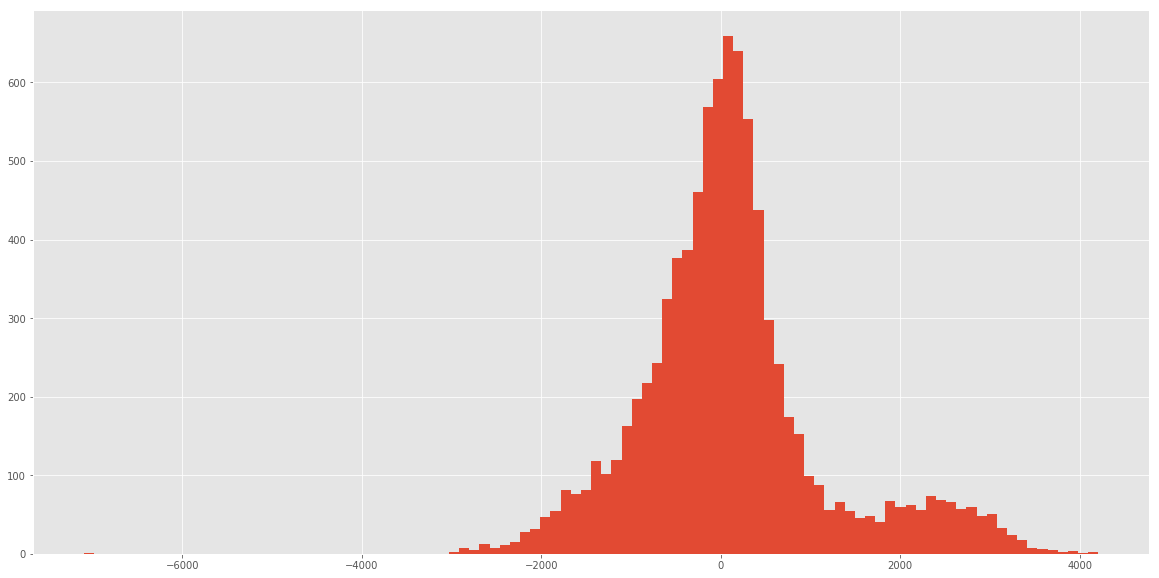

In [795]:
# посмотрим на гистограмму - в целом напоминает нормальное распредление, но скорее смесь двух нормальных распределений
# второе распределение - скорее всего артефакт выходных, которые попали на дни с другими датами
plt.hist(X_data_2017.values.flatten() - X_data_2016.values.flatten(), bins=100);

In [ ]:
# TODO! Проверить критериями на нормальность

In [800]:
# rmse(np.ones_like(X_data_2016.values.flatten()) * X_data_2016.values.flatten().mean(), X_data_2017.values.flatten())
# plt.hist(np.ones_like(X_data_2016.values.flatten()) * X_data_2016.values.flatten().mean() - X_data_2017.values.flatten(), bins=100);

In [801]:
# Прогноз по кластерам кластеризум, проставялем метку кластери и обучаем на календарных призаках

In [ ]:
# wdays_names = {0:'пн', 1:'вт', 2:'ср', 3:'чт', 4:'пт', 5:'сб', 6:'вс'}
# for wd in range(7):
#     mean_cons = pv_table_flat[(pv_table_flat.year > 2006) & (pv_table_flat.year <= 2016)].mean().drop(['year', 'week', 'weekday'])
#     plt.plot(mean_cons)
#     # print(mean_cons)
# plt.legend([wdays_names[wd] for wd in range(7)])

In [806]:
pv_train = pv_table_flat[(pv_table_flat.year > 2006) & (pv_table_flat.year <= 2016)]

In [807]:
_pv = pv_train
X_data_train = _pv[[c for c in pv_table_flat.columns if c not in ['year', 'week', 'weekday']]]

In [811]:
n_clusters = 20
kmeans_20 = cluster.KMeans(n_clusters=n_clusters, n_init=100)
reduced_data = X_data_train
# print(X_data_train.shape)
kmeans_20.fit(reduced_data)
date_cluster_20 = kmeans_20.predict(X_data_train)

In [814]:
np.unique(date_cluster_20, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19], dtype=int32),
 array([148, 113, 134, 118, 160, 118, 237, 142, 185, 296, 255, 168, 240,
        283, 184, 340, 123, 130,  92, 187]))

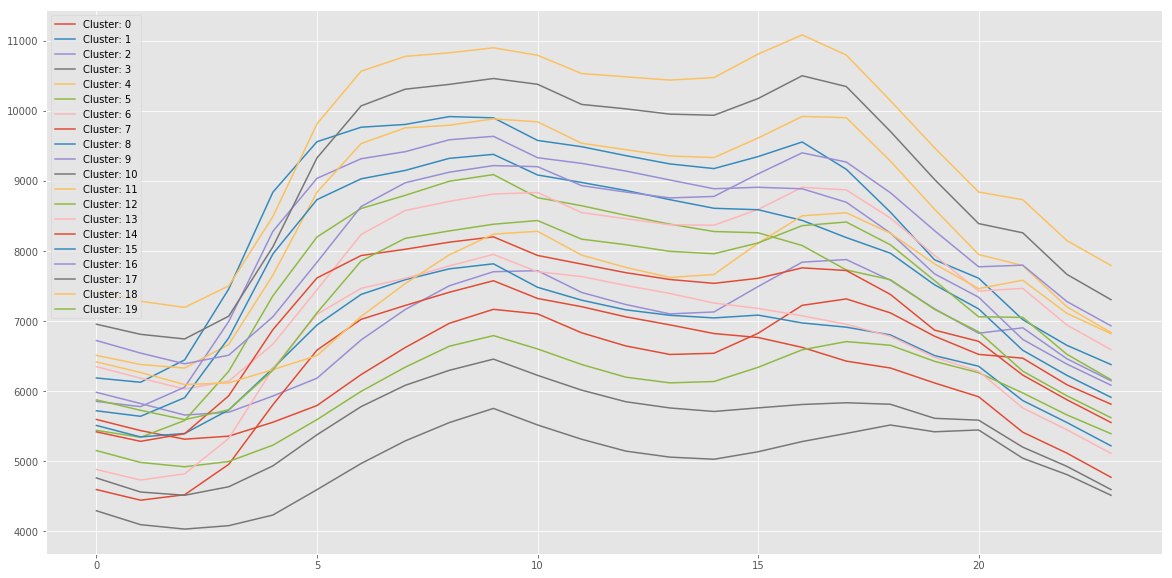

In [818]:
# найдем профили кластеров
cluster_profiles = {}
for _clusternum in np.unique(date_cluster_20):
    _pltdata = X_data_train[date_cluster_20 == _clusternum].mean()
    cluster_profiles[_clusternum] = _pltdata
    plt.plot(_pltdata)
plt.legend([''.join(['Cluster: ', str(_c)]) for _c in np.unique(date_cluster_20)])

In [820]:
# проставим метки
pv_labeled = pv_train.copy()
pv_labeled['cluster_id'] = date_cluster_20

In [833]:
# теперь обучим классификатор на этой модели
from sklearn.ensemble import RandomForestClassifier

In [866]:
X = pv_labeled[[c for c in pv_labeled.columns if c in ['week', 'weekday']]]
y = date_cluster_20

In [867]:
X.shape, y.shape

((3653, 2), (3653,))

In [868]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)
clf.fit(X, y)  
print(clf.feature_importances_)

[0.46400372 0.53599628]


In [869]:
# попробуем предсказать 2017-й
pv_test = pv_table_flat[(pv_table_flat.year == 2017)]
pv_test_features = pv_test[['week', 'weekday']]

In [870]:
predict = clf.predict(pv_test_features)

In [871]:
np.unique(predict, return_counts=True)

(array([ 2,  6,  8, 10, 12, 15, 18], dtype=int32),
 array([  3,   8,  41,  60,  45, 200,   8]))

In [878]:
pr_predicted = pv_test.copy()

In [879]:
pv_test.loc[pv_test_features.index].head()

hour,year,week,weekday,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
4019,2017,1,6,6828.0,6602.0,6340.0,6313.0,6432.0,6435.0,6859.0,...,7564.0,8221.0,8590.0,8628.0,8202.0,7807.0,7484.0,7516.0,7143.0,6845.0
4020,2017,2,0,6688.0,6580.0,6536.0,6858.0,7669.0,8539.0,9394.0,...,9885.0,10409.0,10583.0,10247.0,9562.0,8934.0,8464.0,8348.0,7777.0,7424.0
4021,2017,2,1,7131.0,6972.0,7017.0,7223.0,7964.0,8776.0,9606.0,...,9980.0,10567.0,10848.0,10565.0,9821.0,9243.0,8613.0,8532.0,7944.0,7643.0
4022,2017,2,2,7373.0,7207.0,7110.0,7430.0,8157.0,8950.0,9831.0,...,10225.0,10673.0,10677.0,10322.0,9613.0,9083.0,8523.0,8420.0,7964.0,7488.0
4023,2017,2,3,7239.0,7200.0,6983.0,7321.0,8001.0,8858.0,9610.0,...,10225.0,10692.0,10849.0,10497.0,9792.0,9218.0,8718.0,8544.0,8150.0,7809.0


In [881]:
pr_predicted['cluster_id'] = predict

In [885]:
cols_to_change = list(range(24))

In [896]:
# прописали значения усредненных кластеров
for _cn in np.unique(predict):
    pr_predicted.loc[pr_predicted['cluster_id'] == _cn, cols_to_change] = cluster_profiles[_cn].values

In [898]:
pr_predicted.head(10)

hour,year,week,weekday,0,1,2,3,4,5,6,...,15,16,17,18,19,20,21,22,23,cluster_id
4019,2017,1,6,6415.989130,6265.793478,6093.000000,6117.413043,6306.315217,6506.282609,7065.728261,...,8111.065217,8502.445652,8546.271739,8253.510870,7815.804348,7463.402174,7582.663043,7110.326087,6819.054348,18
4020,2017,2,0,6954.698039,6810.403922,6744.254902,7070.121569,8059.294118,9329.109804,10071.768627,...,10177.101961,10502.427451,10348.250980,9707.458824,9022.047059,8391.227451,8259.709804,7666.607843,7305.219608,10
4021,2017,2,1,6954.698039,6810.403922,6744.254902,7070.121569,8059.294118,9329.109804,10071.768627,...,10177.101961,10502.427451,10348.250980,9707.458824,9022.047059,8391.227451,8259.709804,7666.607843,7305.219608,10
4022,2017,2,2,6954.698039,6810.403922,6744.254902,7070.121569,8059.294118,9329.109804,10071.768627,...,10177.101961,10502.427451,10348.250980,9707.458824,9022.047059,8391.227451,8259.709804,7666.607843,7305.219608,10
4023,2017,2,3,6954.698039,6810.403922,6744.254902,7070.121569,8059.294118,9329.109804,10071.768627,...,10177.101961,10502.427451,10348.250980,9707.458824,9022.047059,8391.227451,8259.709804,7666.607843,7305.219608,10
4024,2017,2,4,6954.698039,6810.403922,6744.254902,7070.121569,8059.294118,9329.109804,10071.768627,...,10177.101961,10502.427451,10348.250980,9707.458824,9022.047059,8391.227451,8259.709804,7666.607843,7305.219608,10
4025,2017,2,5,6349.489451,6184.827004,6029.932489,6142.029536,6669.607595,7445.696203,8236.341772,...,8593.810127,8909.607595,8871.949367,8470.341772,7938.607595,7428.772152,7466.396624,6944.147679,6591.489451,6
4026,2017,2,6,6415.989130,6265.793478,6093.000000,6117.413043,6306.315217,6506.282609,7065.728261,...,8111.065217,8502.445652,8546.271739,8253.510870,7815.804348,7463.402174,7582.663043,7110.326087,6819.054348,18
4027,2017,3,0,6954.698039,6810.403922,6744.254902,7070.121569,8059.294118,9329.109804,10071.768627,...,10177.101961,10502.427451,10348.250980,9707.458824,9022.047059,8391.227451,8259.709804,7666.607843,7305.219608,10
4028,2017,3,1,6954.698039,6810.403922,6744.254902,7070.121569,8059.294118,9329.109804,10071.768627,...,10177.101961,10502.427451,10348.250980,9707.458824,9022.047059,8391.227451,8259.709804,7666.607843,7305.219608,10


In [899]:
# посчитаем RMSE

In [909]:
pr_predicted[cols_to_change].values.flatten().shape, X_data_2017.values.flatten().shape

((8760,), (8760,))

In [910]:
rmse(pr_predicted[cols_to_change].values.flatten(), X_data_2017.values.flatten())

851.0960329608166

### Метрика RMSE на бейзлайне была 1057, стало 851, не то, чтобы много, но на 20% метрика улучшилась

In [911]:
# Посмотрим на распределение ошибки

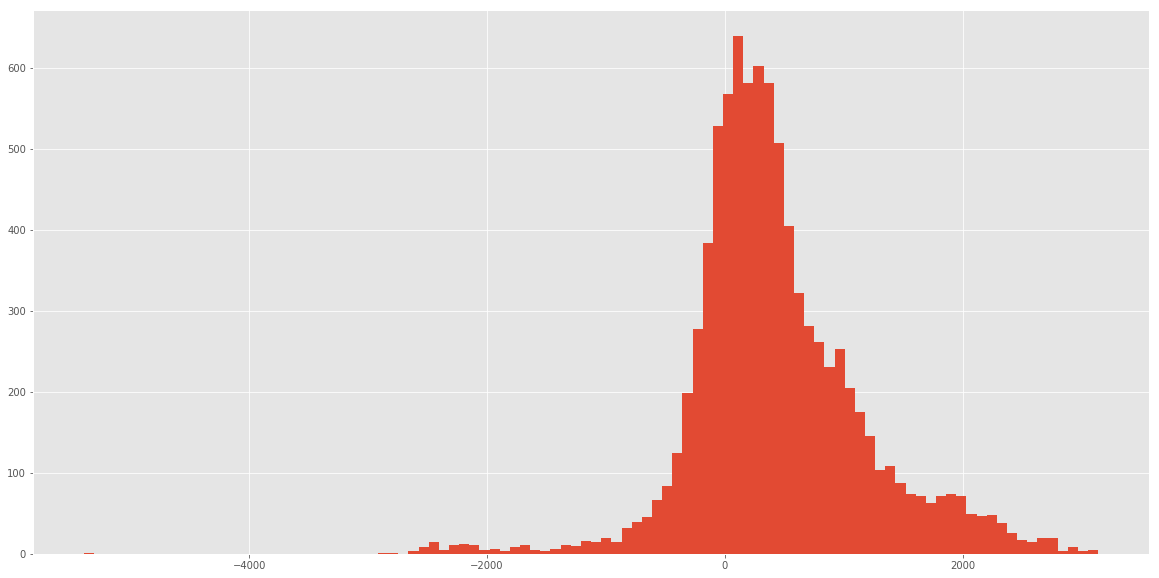

In [912]:
plt.hist(X_data_2017.values.flatten() - pr_predicted[cols_to_change].values.flatten(), bins=100);

In [ ]:
# рапределение ошибки стало немного другим, чуть более ровным